<a id="libraries"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
    2. Getting Jupyter Ready
    </span>   
</h2>

In [371]:
!pip install missingno plotly

<h3 name='libraries'>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
    2.1 Import Python Libraries
    </span>   
</h3>

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
    2.2 Supress Warnings
    </span>   
</h3>

In [373]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
    2.3 Adjust Jupyter Views
    </span>   
</h3>

In [374]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
        3. Reading & Understanding the data
    </span>   
</h2>

<a id="input"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        3.1 Importing the input files
    </span>   
</h3>

In [383]:
day_df = pd.read_csv('day.csv')

#### Column datatype conversion
The sole column requiring a datatype conversion is the date column, transitioning from 'object' to 'datetime.' This transformation will be executed utilizing Pandas' 'to_datetime' function.

In [384]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [386]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%d-%m-%Y')

<a id="dictionary"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        3.2 Data Dictionary & Rename Column
    </span>   
</h3>

<table style="float:left">
    <tr>
        <th>Column</th>
        <th >Description</th>
        <th >New Name</th>
        <th>Data Type</th>
        <th>Type</th>
    </tr>
    <tr>
        <td>instant</td>
        <td>Unique Record Index</td>
        <td>id</td>
        <td>int</td>
        <td></td>
    </tr>
    <tr>
        <td>dteday</td>
        <td>Date</td>
        <td>date</td>
        <td>datetime</td>
        <td>Date</td>
    </tr>
    <tr>
        <td>season</td>
        <td>This variable encapsulates the four distinct seasons—spring (1), summer (2), fall (3), and winter (4)</td>
        <td></td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>yr</td>
        <td>This variable represents the year. 0 meaning 2018 and 1 meaning 2019</td>
        <td>year</td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>mnth</td>
        <td>This variable represents each month of the year ranging from 1 to 12</td>
        <td>month</td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>holiday</td>
        <td>This represents whether its holiday on this day or not</td>
        <td></td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>weekday</td>
        <td>Day of the week</td>
        <td>week_day</td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>workingday</td>
        <td>This represents if day is a working day or not. If day is neither weekend nor holiday then 1, otherwise is 0</td>
        <td>working_day</td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>weathersit</td>
        <td>
            Situation of the weather.
            <ol>
                <li>Clear, Few clouds, Partly cloudy, Partly cloudy</li>
                <li>Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
                <li>Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
                <li>Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
            </ol>
        </td>
        <td>weather_situation</td>
        <td>int</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>temp</td>
        <td>Temperature in celsius</td>
        <td></td>
        <td>float</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>atemp</td>
        <td>feeling temperature in Celsius</td>
        <td></td>
        <td>float</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>hum</td>
        <td>humidity</td>
        <td>humidity</td>
        <td>float</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>windspeed</td>
        <td>wind speed</td>
        <td>wind_speed</td>
        <td>float</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>casual</td>
        <td>count of casual users</td>
        <td></td>
        <td>int</td>
        <td>Numeric</td>
    </tr><tr>
        <td>registered</td>
        <td>count of registered users</td>
        <td></td>
        <td>int</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>cnt</td>
        <td>count of total rental bikes including both casual and registered</td>
        <td>total_count</td>
        <td>int</td>
        <td>Numeric</td>
    </tr>
</table>

In [387]:
# Map the name of old columns with new one in a data dictionary
column_name_map = {'instant': 'id', 'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weekday': 'week_day', 'workingday': 'working_day', 'weathersit': 'weather_situation', 'hum': 'humidity', 'windspeed': 'wind_speed', 'cnt': 'total_count'}

# Rename the columns
day_df.rename(columns = column_name_map, inplace=True)

In [276]:
day_df.columns

Index(['id', 'date', 'season', 'year', 'month', 'holiday', 'week_day', 'working_day', 'weather_situation', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'total_count'], dtype='object')

<a id="inspect"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        3.4 Inspect Dataframe
    </span>   
</h3>

In [277]:
# Database dimension
print("Database dimension     :",day_df.shape)

#Database size
print("Database size          :",day_df.size)

Database dimension     : (730, 16)
Database size          : 11680


In [278]:
# Checking the numeric variables of the dataframes
day_df.describe()

,id,season,year,month,holiday,week_day,working_day,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<a id="clean"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
        4. Data Cleaning & Manipulation
    </span>   
</h2>

<a id="duplication"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        4.1 Duplicate Rows Check
    </span>   
</h3>

In [279]:
# Check for duplicate rows in the dataset.
# dteday column is used to check if the rows are duplicate
duplicate_rows=day_df[day_df.duplicated(['date'])]
print("Number of duplicate rows: ", len(duplicate_rows))

Number of duplicate rows:  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are no duplicate rows in the dataset
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        4.2 Null Value Calculation
    </span>   
</h3>

#### 4.2.1 Missing Values 

<AxesSubplot:>

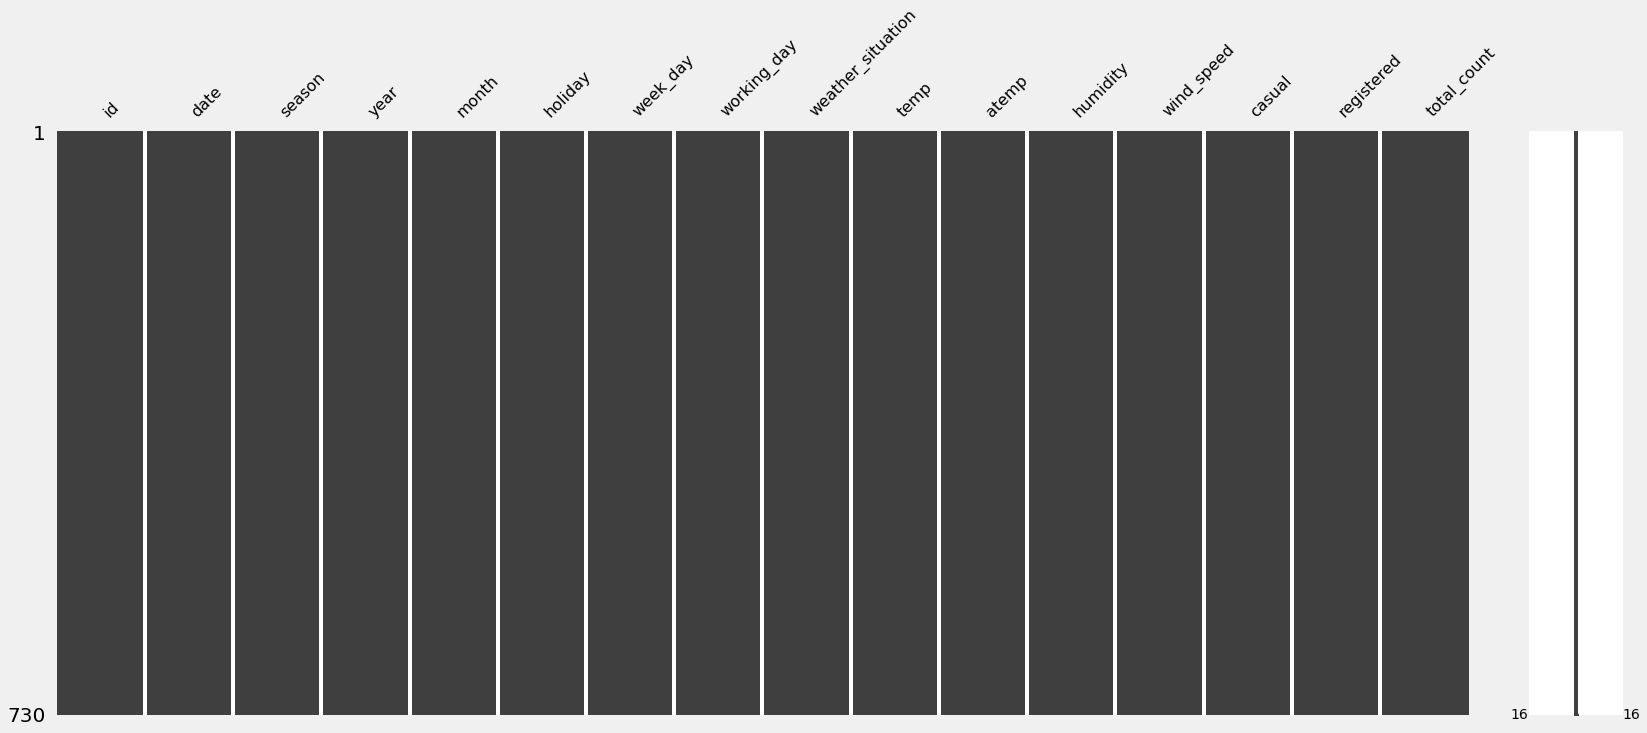

In [280]:
import missingno as mn
mn.matrix(day_df)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix, it is evidednt that the dataset has no missing values.
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        4.3 Data Validation
    </span>   
</h3>

#### Month validation
Let's conduct a validation to ensure alignment between the 'Month' column and the corresponding month values in the 'Date' column. To achieve this, we will convert the string representation to a date format, extracting the month for subsequent comparison with the values in the respective column.

In [281]:
def validate_column_alingment(dataframe, date_column, target_column, process_extracted_component=False, date_component='month'):
    """
    Validates alignment between a target column and the corresponding date component values in a 'Date' column.

    Parameters:
    - dataframe: pandas DataFrame
    - target_column: str, name of the target column (e.g., 'month' or 'year')
    - date_column: str, name of the 'date' column
    - date_component: str, the date component to extract ('month' or 'year')

    Returns:
    - List of rows with misalignment
    """
    try:
        # Extract the specified date component from the 'Date' column
        extracted_component = getattr(dataframe[date_column].dt, date_component)
        
        if process_extracted_component:
            extracted_component = process_extracted_component(extracted_component)

        # Identify columns with misalignment
        mismatched_rows = dataframe[dataframe[target_column] != extracted_component]

        return mismatched_rows

    except Exception as e:
        print(f"Error: {e}")
        return False

In [282]:
total_mismatched_months = validate_column_alingment(
    dataframe=day_df,
    date_column='date',
    target_column='month',
    date_component='month')
print(len(total_mismatched_months))

0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>A discrepancy is observed in 264 rows, where the values in the 'month' column diverge from the corresponding month values in the 'date' column.
    </span>    
</div>

#### Year Validation

Let's convert the extracted year from date column to its respective category. Meaning if the year is 2018 then 0, anf 1 for 2019. For this, we will write a helper function which will convert the extracted component into these categories.

In [283]:
def year_to_category(extracted_component):
    return extracted_component.map({ 2018: 0, 2019: 1 })

In [284]:
new_mismatched_years = validate_column_alingment(
    dataframe=day_df,
    date_column='date',
    target_column='year',
    date_component='year',
    process_extracted_component=year_to_category)
print(len(new_mismatched_years))

0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Now we see that there is no discrepency in the value of year.
    </span>    
</div>

#### Total Count Validation

In this comprehensive validation process, we aim to ensure the integrity of user data by verifying whether the total count of users corresponds precisely to the combined sum of casual users and registered users. This meticulous verification serves as a critical step in maintaining data accuracy and reliability within our system.

In [285]:
mismatched_counts = day_df[day_df['casual'] + day_df['registered'] != day_df['total_count']]
print(len(mismatched_counts))

0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>We see that there are no mismatch in the total count of the users.
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        4.4 Analyze & Delete Unnecessary Columns
    </span>   
</h3>

#### id

This column can be deleted as this is just a unique identifier for the row and does not add any significance in the data set

#### date

The date column can be removed from the data set as all the necessary data has been extracted out from this coumn into the 'month', 'year', and 'day' columns

#### casual

In the context of our current analytical challenge, focused on predicting the volume of rental bike users, we propose the exclusion of the 'casual' column from our dataset. This decision is informed by the acknowledgment that the 'casual' count is inherently encompassed within the comprehensive 'total_count' column, streamlining our dataset for enhanced model accuracy and interpretability.

#### registered

In the context of our current analytical challenge, focused on predicting the volume of rental bike users, we propose the exclusion of the 'registered' column from our dataset. This decision is informed by the acknowledgment that the 'registered' count is inherently encompassed within the comprehensive 'total_count' column, streamlining our dataset for enhanced model accuracy and interpretability.

In [286]:
# List of irrelevant columns
irrelevant_columns=['id', 'date', 'casual', 'registered']

In [287]:
# Plot a pie chart to show the total number of irrelevant columns and total valid columns
irrelevant_columns_figure = px.pie(
    values=[day_df.shape[1] - len(irrelevant_columns), len(irrelevant_columns)],
    names=['Valid Columns', 'Irrelevant Columns'],
    hole=0.6,
    width=700,
    height=350)
# irrelevant_columns_figure.update_traces(textinfo='value', textfont_size=12,
#                   marker=dict(line=dict(color='#000000', width=2)))
irrelevant_columns_figure.show()

In [288]:
day_df = day_df.drop(columns=irrelevant_columns)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>In our comprehensive analysis, we identified that among the initial set of 16 columns, four were deemed irrelevant to our specific case study. In an effort to refine our dataset and enhance the precision of our investigation, we have systematically removed these columns. Consequently, we now proceed with a focused set of 12 columns for further in-depth analysis.
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        4.5 Map Categorical Columns
    </span>   
</h3>

In the existing dataset, categorical columns are represented by numeric values. To enhance interpretability, we will proceed to transform these numerical representations into their corresponding categorical values. This transformation will be achieved by referencing a predefined dictionary that associates each numeric code with its respective categorical label.

#### Season

1. Spring
2. Summer
3. Fall
4. Winter

In [289]:
season_dictionary = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_dictionary)

#### Year

0. 2018
1. 2019

In [290]:
year_dictionary = {0: 2018, 1: 2019}
day_df['year'] = day_df['year'].map(year_dictionary)

#### Month

1. January
2. February
3. March
4. April
5. May
6. June
7. July
8. August
9. September
10. October
11. November
12. December

In [291]:
month_dictionary = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
day_df['month'] = day_df['month'].map(month_dictionary)

#### Weekday

0. Tuesday
1. Wednesday
2. Thursday
3. Friday
4. Saturday
5. Sunday
6. Monday

In [292]:
weekday_dictionary = {0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'}
day_df['week_day'] = day_df['week_day'].map(weekday_dictionary)

#### Weather Situation

1. Good
2. Moderate
3. Bad
4. Severe

In [293]:
weather_situation_dictionary = {1: 'Good', 2: 'Moderate', 3: 'Bad', 4: 'Severe'}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_situation_dictionary)

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        4.6 Outlier Identification & Removal
    </span>   
</h3>

In [294]:
def show_box_plot(data, target, points=False, horizontal=False):
    fig = px.box(data, y=target, points=points)
    if horizontal == True:
        fig = px.box(data, x=target, points=points)
    fig.show()

#### Total Count

In [295]:
show_box_plot(data=day_df, target="total_count", points="all", horizontal=True)

#### Wind Speed

In [296]:
show_box_plot(data=day_df, target="wind_speed", points="all", horizontal=True)

#### Humidity

In [297]:
show_box_plot(data=day_df, target="humidity", points="all", horizontal=True)

#### ATemp

In [298]:
show_box_plot(data=day_df, target="atemp", points="all", horizontal=True)

#### Temp

In [299]:
show_box_plot(data=day_df, target="temp", points="all", horizontal=True)

<a id="import"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
        5. Exploratory Data Analysis
    </span>   
</h2>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        5.1 Plotting Functions
    </span>   
</h3>

These auxiliary functions serves as a comprehensive toolkit designed for the visualization of graphs during the exploratory data analysis phase. These functions are meticulously crafted to facilitate a systematic and insightful examination of the dataset, aiding in the extraction of meaningful patterns, trends, and correlations. Leveraging these functions enhances the efficiency and effectiveness of the exploratory analysis process, allowing for a more nuanced understanding of the underlying data structure.

In [300]:
def fequency_and_box_plot(data, feature, figsize):
    """
    The function frequency_and_box_plot is designed to generate a pair of visualizations for a given
    feature in a dataset. It produces a frequency plot (histogram) and a box plot arranged in a 2x2
    subplot layout. The frequency plot illustrates the distribution of the feature's values, providing
    insights into its spread and concentration. Simultaneously, the box plot offers a summary of the
    feature's central tendency, variability, and the presence of potential outliers. The function accepts
    the dataset (data), the specific feature of interest (feature), and a specified figure size (figsize)
    for customization. The resulting visualizations enhance the exploratory data analysis process by offering
    a visual understanding of the selected feature's characteristics.
    
    Parameters:
    - dataframe: Pandas DataFrame
    - feature: Name of the target column (e.g., 'month' or 'year')
    - figsize: The size of the graph to generate
    """
    plt.figure(figsize=figsize)
    plt.subplot(2, 2, 1)
    dist_plot = sns.distplot(data[feature], rug=True)
    dist_plot.set(title='Frequency Plot ' + feature)
    dist_plot.set_xlabel(feature)
    dist_plot.set_ylabel('frequency')
    
    plt.subplot(2, 2, 2)
    dist_plot = sns.boxplot(y=data[feature])
    dist_plot.set(title='Box plot for ' + feature)
    dist_plot.set_ylabel(feature)

    plt.show()

In [301]:
def univariate_categorical(feature, label_rotation=False):
    """
    The univariate_categorical function generates a bar plot depicting the distribution of a categorical
    feature. The plot showcases the total count of each category, utilizing Seaborn's barplot with customizable
    parameters such as figure size, color palette, and label rotation for enhanced readability. The y-axis is
    formatted to display counts in thousands for a clearer presentation of data magnitude. This function is
    particularly useful for exploring and understanding the distribution of categories within a given dataset.
    
    Parameters:
    - feature: Name of the target column (e.g., 'month' or 'year').
    - label_rotation: This boolean parameters denote if the label should be rotated by 90 degrees.
    """
    
    plt.figure(figsize=(20,10))
        
    s = sns.barplot(x = feature, 
                    y='total_count',
                    data=day_df,
                    estimator=sum,
                    ci=None,
                    palette='crest',
                   linewidth=1.5)
    if label_rotation:
        plt.xticks(rotation=90)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}k'))


    plt.show();

In [302]:
def bivariate(x, y, df, title, horizontal_layout=True):
    """
    The bivariate function creates a pair of visualizations to explore the relationship between two variables.
    It offers the flexibility of choosing between a horizontal or vertical layout. In the horizontal layout,
    it generates side-by-side box and violin plots, while in the vertical layout, these plots are stacked
    vertically. The box plot provides insights into the central tendency and spread, while the violin plot
    offers a more detailed view of the distribution. The function accepts parameters such as the variables
    (x and y), the dataset (df), a title for the plots, and an option for layout customization. This function
    proves valuable for gaining a nuanced understanding of the bivariate relationship within the given dataset.
    
    Parameters:
    - x: x feature
    - y: y feature
    - title: Title of the graph
    - horizontal_layout: Tell the function to stack the plots horizontally or not. Default is True
    """
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
    
    s = sns.boxplot(
        ax=ax1,
        x=x,
        y=y,
        data=df, 
        palette = 'crest',
        linewidth=1.5)    
    ax1.set_ylabel(y, fontsize=14, color='blue') 
    ax1.set_xlabel(x, fontsize=14, color='blue') 
    ax1.set_title(title, fontsize=15, color='blue') 
    
    s = sns.violinplot(ax=ax2, x=x, y=y, data=df, palette='rainbow', linewidth=1.5)

    ax2.set_ylabel('', fontsize=14, color='blue')  # Set the y-axis label
    ax2.set_xlabel(x, fontsize=14, color='blue')  # Set the x-axis label
    ax2.set_title(title, fontsize=15, color='blue')  # Set the title of the plot
    plt.show()

In [303]:
def reg_plot(data, y, x, title):
    """
    The reg_plot function creates a scatter plot with a linear regression line to visualize the relationship
    between two variables in a dataset. It accepts the dataset (data), the dependent variable (y), the
    independent variable (x), and a specified title. The resulting plot provides insights into the trend and
    correlation between the variables, aiding in the analysis of their linear relationship.
    
    Parameters:
    - data: The dataframe
    - y: y feature
    - x: x feature
    - title: The title of the graph
    """
    plt.figure(figsize=(6,5),dpi=110)
    plt.title(title,fontsize=16)
    sns.regplot(data=data,y=y,x=x)
    plt.show()

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        5.2 Categorical Univariate Analysis
    </span>   
</h3>

Categorical univariate analysis involves examining and summarizing the distribution of a single categorical variable in a dataset. It aims to understand the frequency or proportion of each category within the variable and often employs visualizations like bar plots or pie charts to depict the distribution. This analysis provides insights into the composition and prevalence of different categories, aiding in the exploration and interpretation of categorical data.

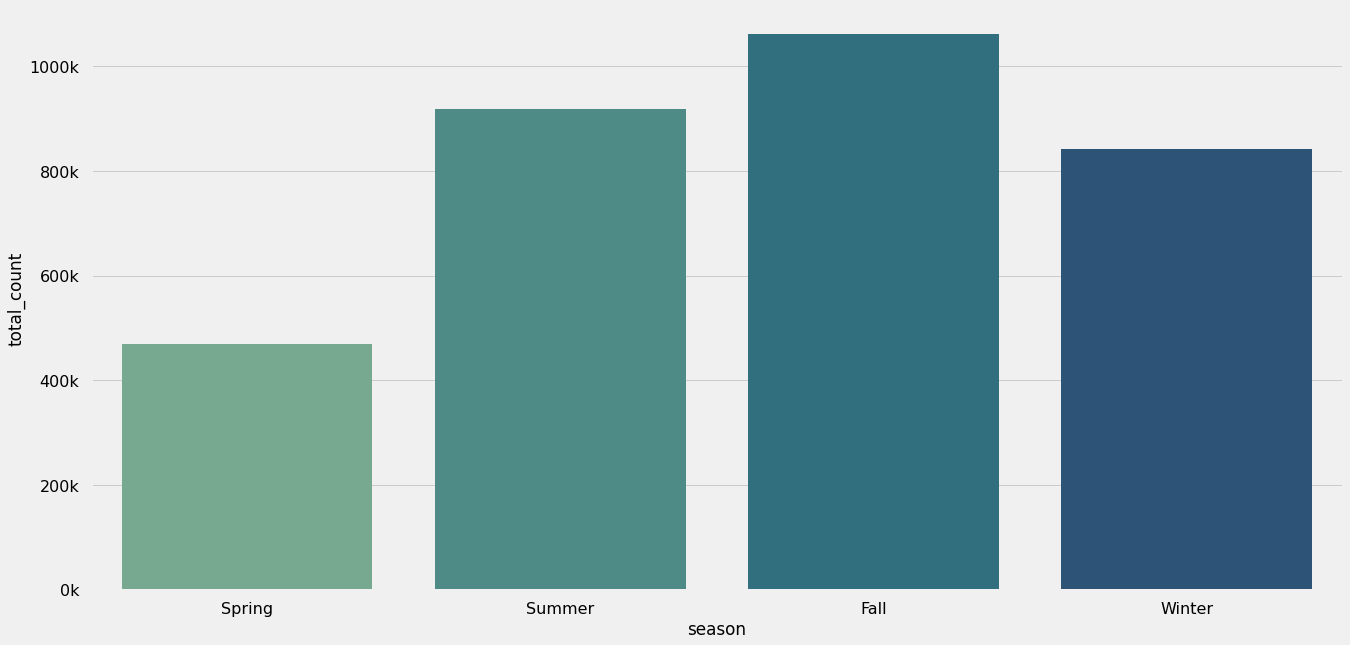

In [304]:
univariate_categorical('season')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The graph illustrates a discernible fluctuation in bike users, correlating with different seasons. Predominantly, the Fall season exhibits the highest user count, while the Spring season portrays the lowest user engagement.
    </span>    
</div>

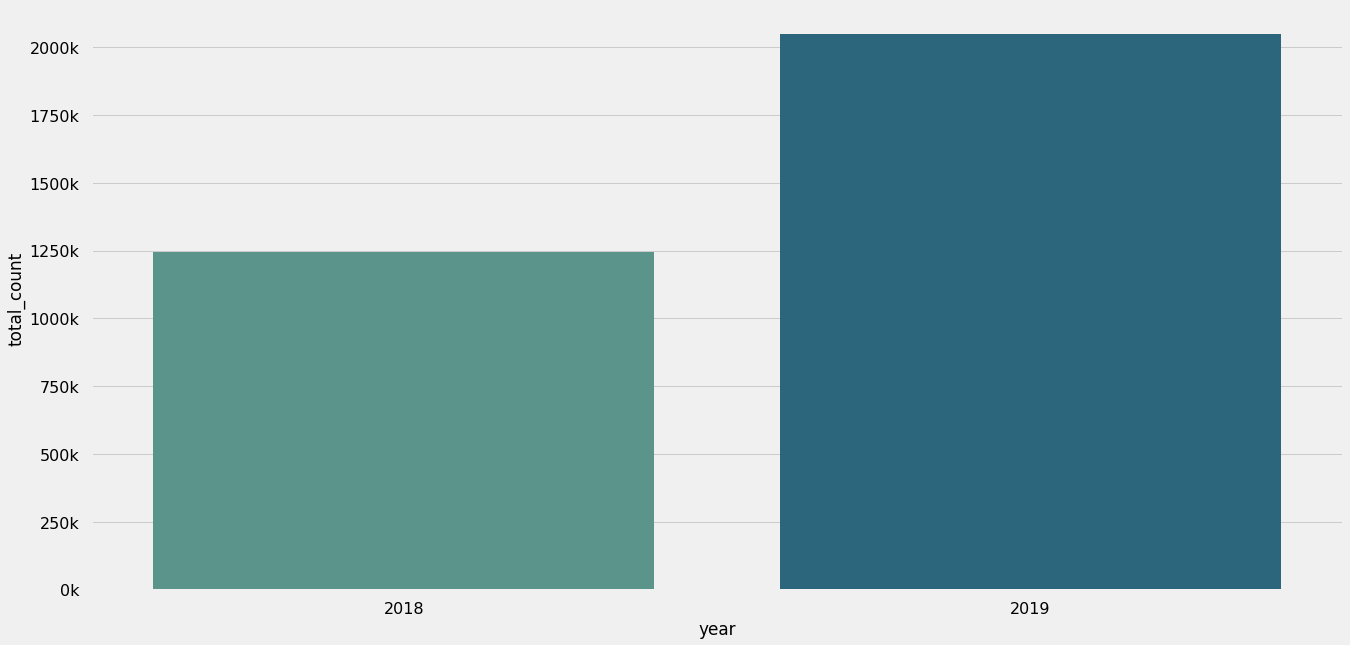

In [305]:
univariate_categorical('year')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The graphical representation indicates a discernible variation in bike users over different years. Notably, the highest number of users is evident in the year 2019, while the lowest user engagement is observed in the year 2018.
    </span>    
</div>

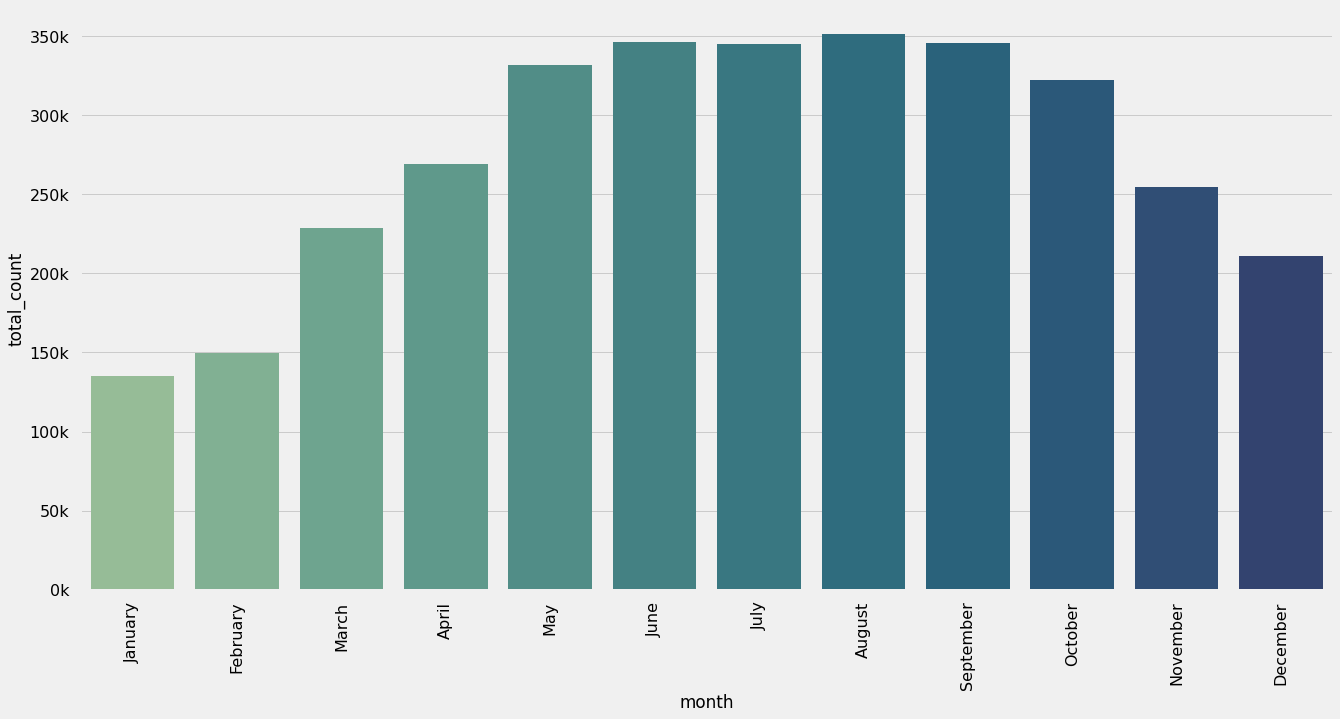

In [306]:
univariate_categorical('month', label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The depicted graph highlights a noticeable fluctuation in bike users across different months. Specifically, the peak user activity is observed during the months spanning from June to September, while the nadir is evident in the period from December to February.
    </span>    
</div>

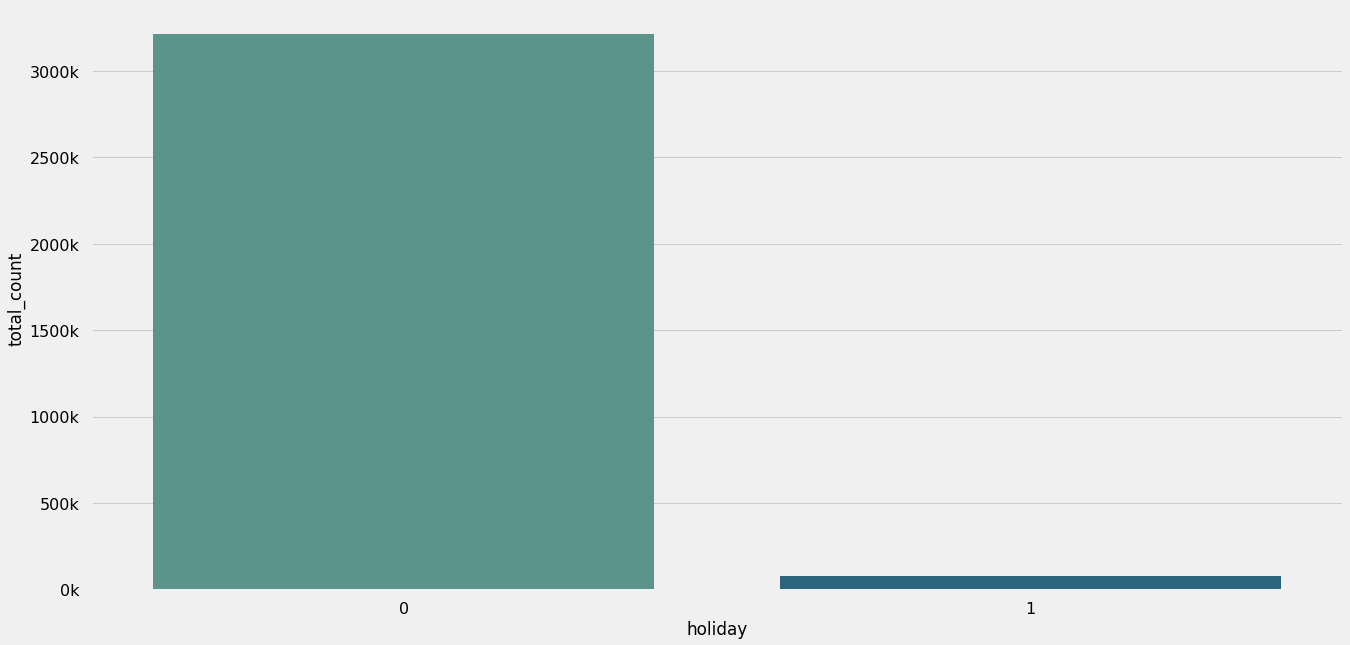

In [307]:
univariate_categorical('holiday')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The graph elucidates a discernible variation in bike users corresponding to holidays. Notably, the highest user count is evident on non-holiday days, while the lowest user engagement is observed during holidays.
    </span>    
</div>

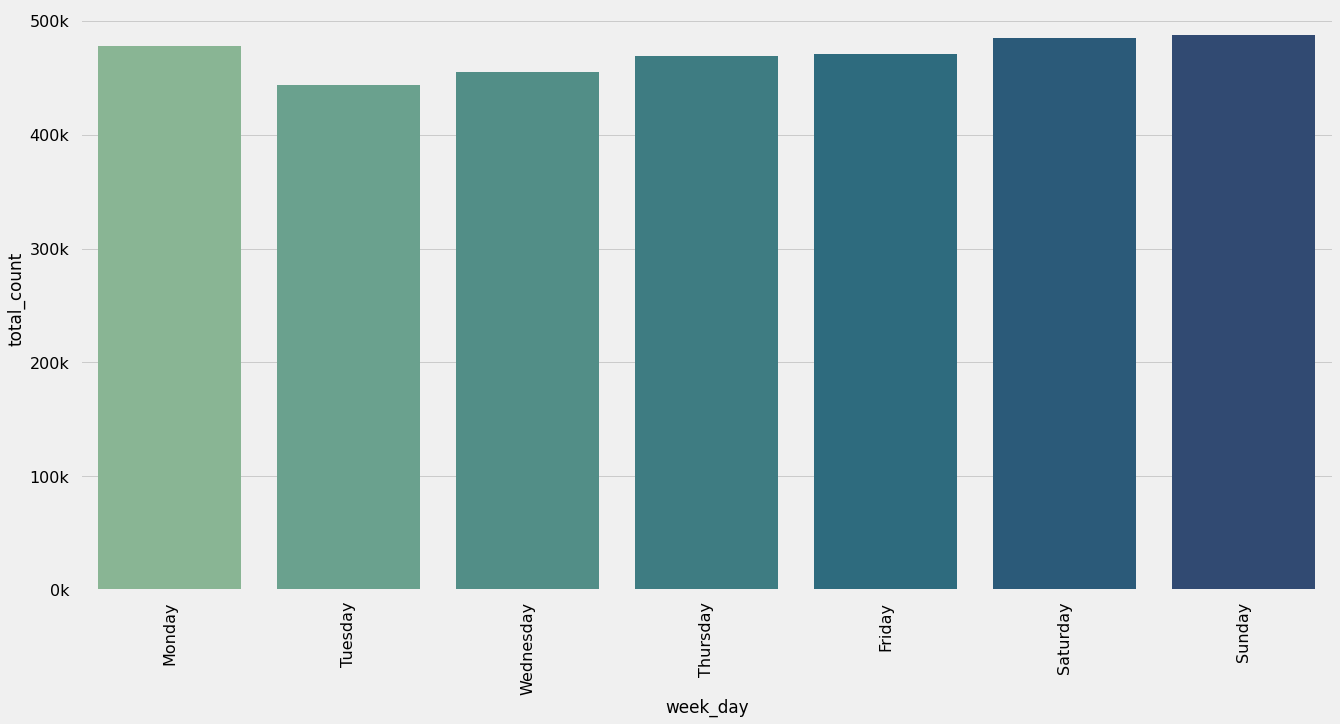

In [308]:
univariate_categorical('week_day', label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>While there is not a significantly noticeable difference in the number of bike users based on weekdays, it appears that Monday stands out as the day with the highest user count.
    </span>    
</div>

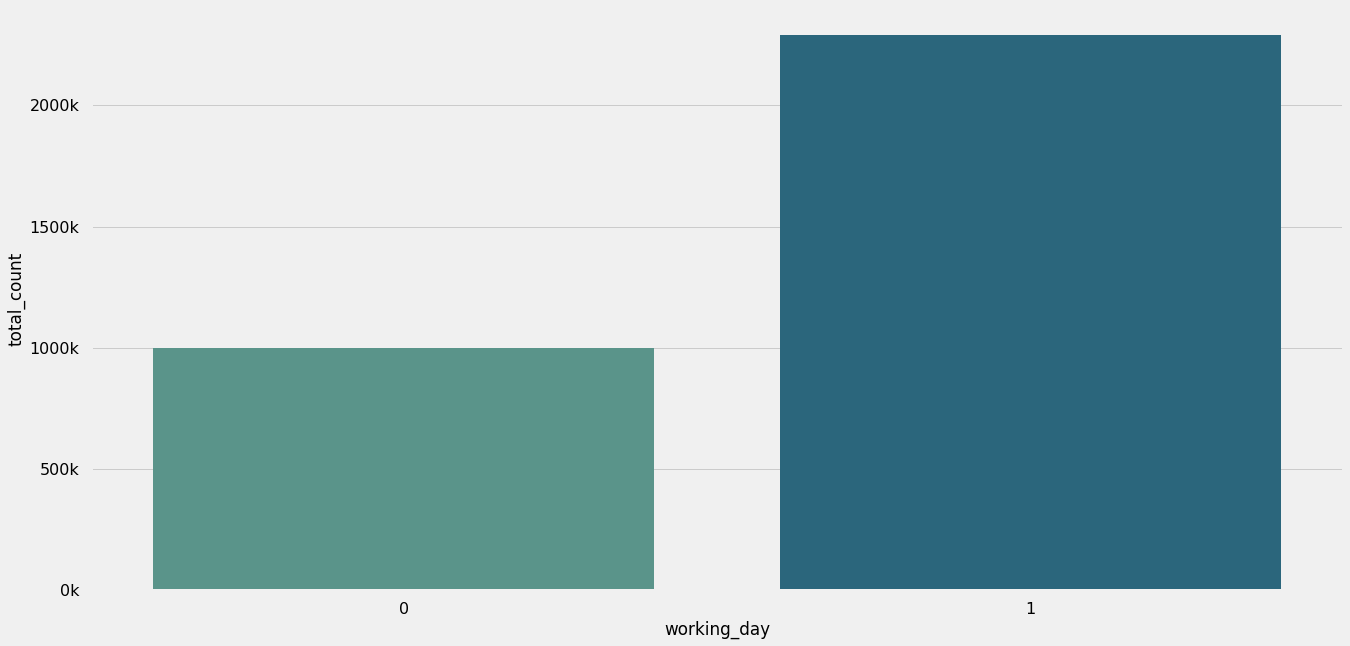

In [309]:
univariate_categorical('working_day')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The presented graph reveals a discernible fluctuation in bike users based on working days. Notably, the highest number of users is observed on working days, while the lowest user engagement is evident on non-working days.
    </span>    
</div>

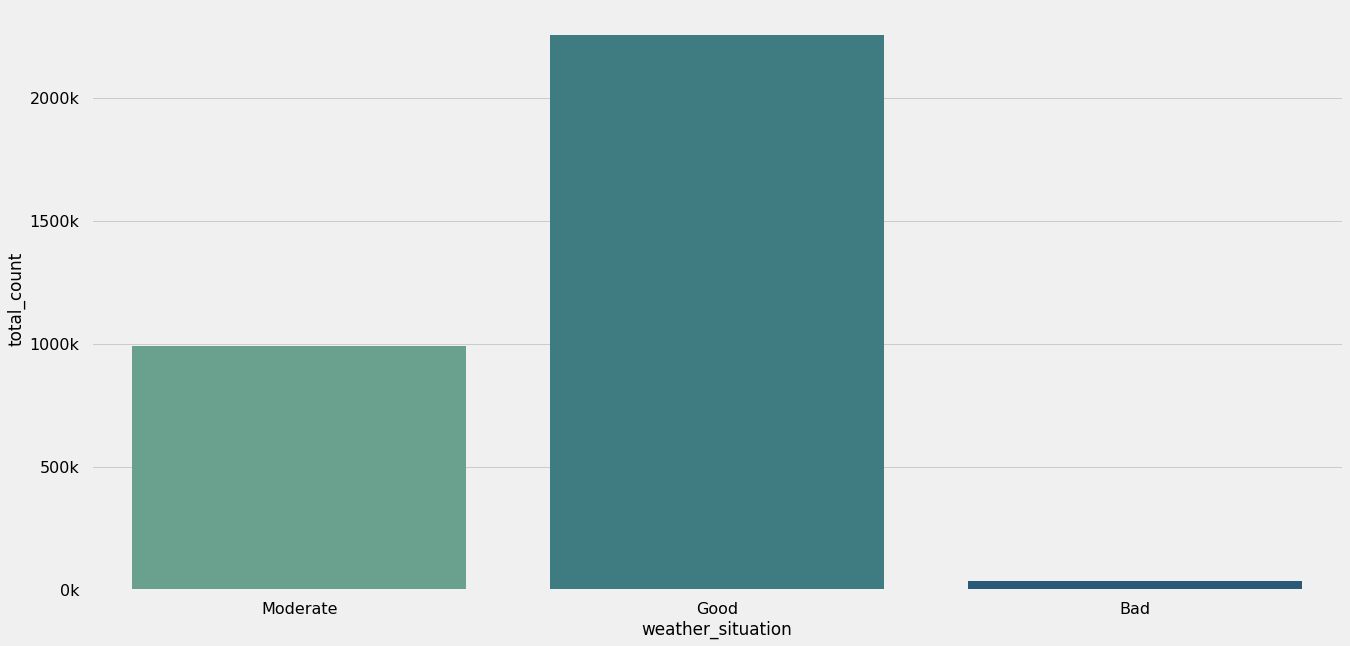

In [310]:
univariate_categorical('weather_situation')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The graph provides clear evidence that the number of bike users varies according to the prevailing weather conditions. As anticipated, the highest user count is observed during favorable weather situations, while the lowest user engagement is noted during adverse weather conditions.
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        5.3 Numerical Univariate Analysis
    </span>   
</h3>

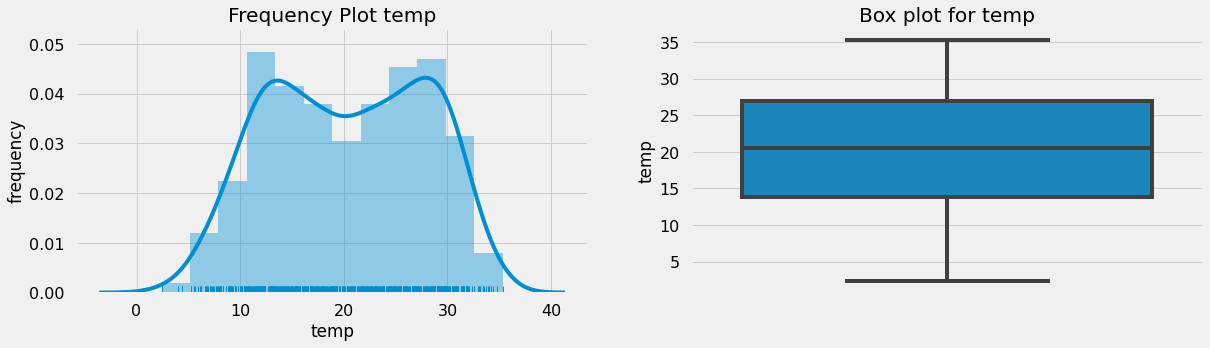

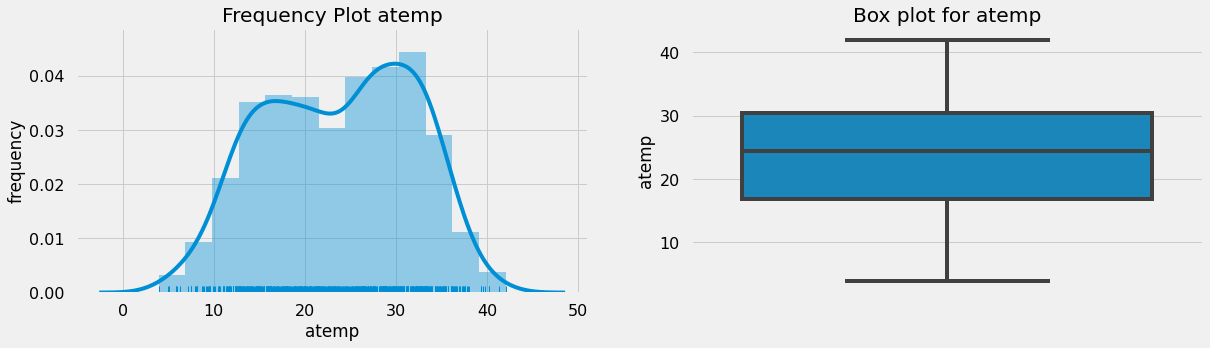

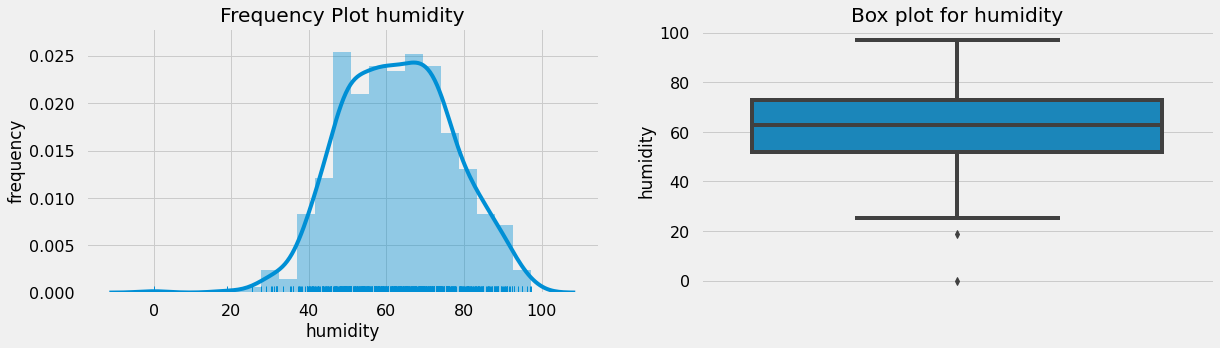

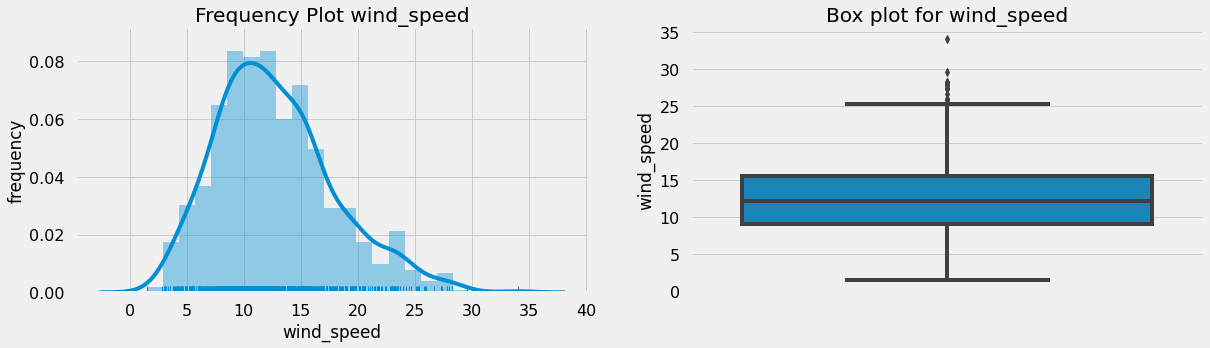

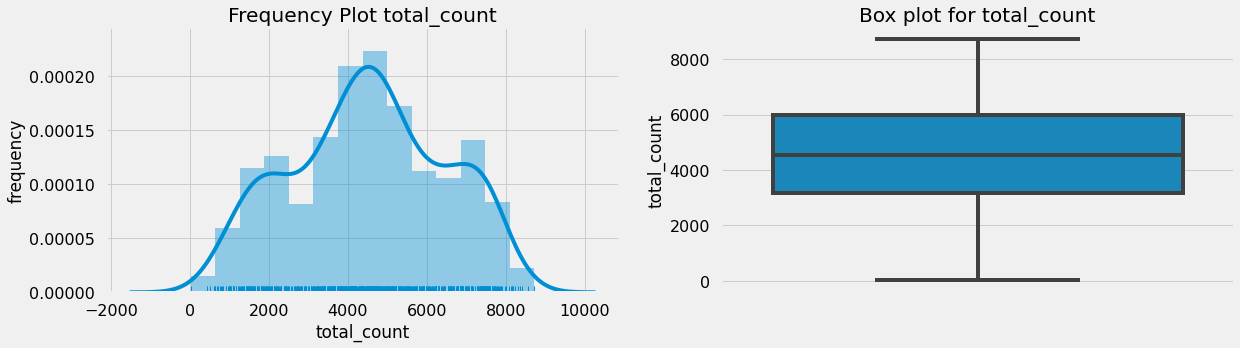

In [311]:
for col_name in ['temp', 'atemp', 'humidity', 'wind_speed', 'total_count']:
    fequency_and_box_plot(day_df, col_name, (18, 10))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>1. Distribution of temp and atemp looks very similar<br>
        2. Most of the humidity ranges from 50 to 70.<br>
        3. Most of the wind-speed ranges from 7 to 15.<br>
        4. Most of the total-count ranges from 4000 to 5000.<br>
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        5.4 Bivariate Analysis 
    </span>   
</h3>

Bivariate analysis involves the simultaneous examination of two variables to understand the relationship or association between them. It explores how changes in one variable correspond to changes in another, helping to uncover patterns, trends, or correlations. This type of analysis is crucial for gaining insights into the interdependence of variables.

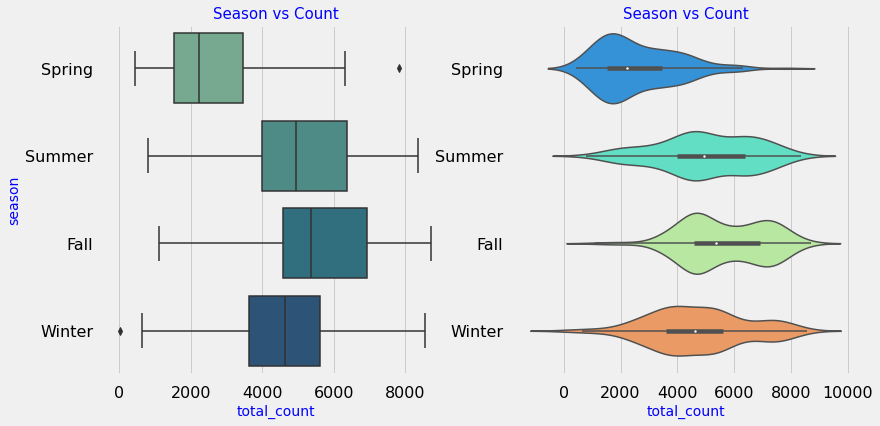

In [312]:
bivariate('total_count','season',day_df, 'Season vs Count', horizontal_layout=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. The fall season exhibits the highest values for statistical measures such as the median, 75th percentile, and 95th percentile in the user count data.<br>
        2. Following the fall season, summer ranks second, while winter secures the third position in terms of user count data.<br>
        3. The user count is evenly distributed across the summer, fall, and winter seasons, indicating a balanced distribution of users among these periods.<br>
    </span>    
</div>

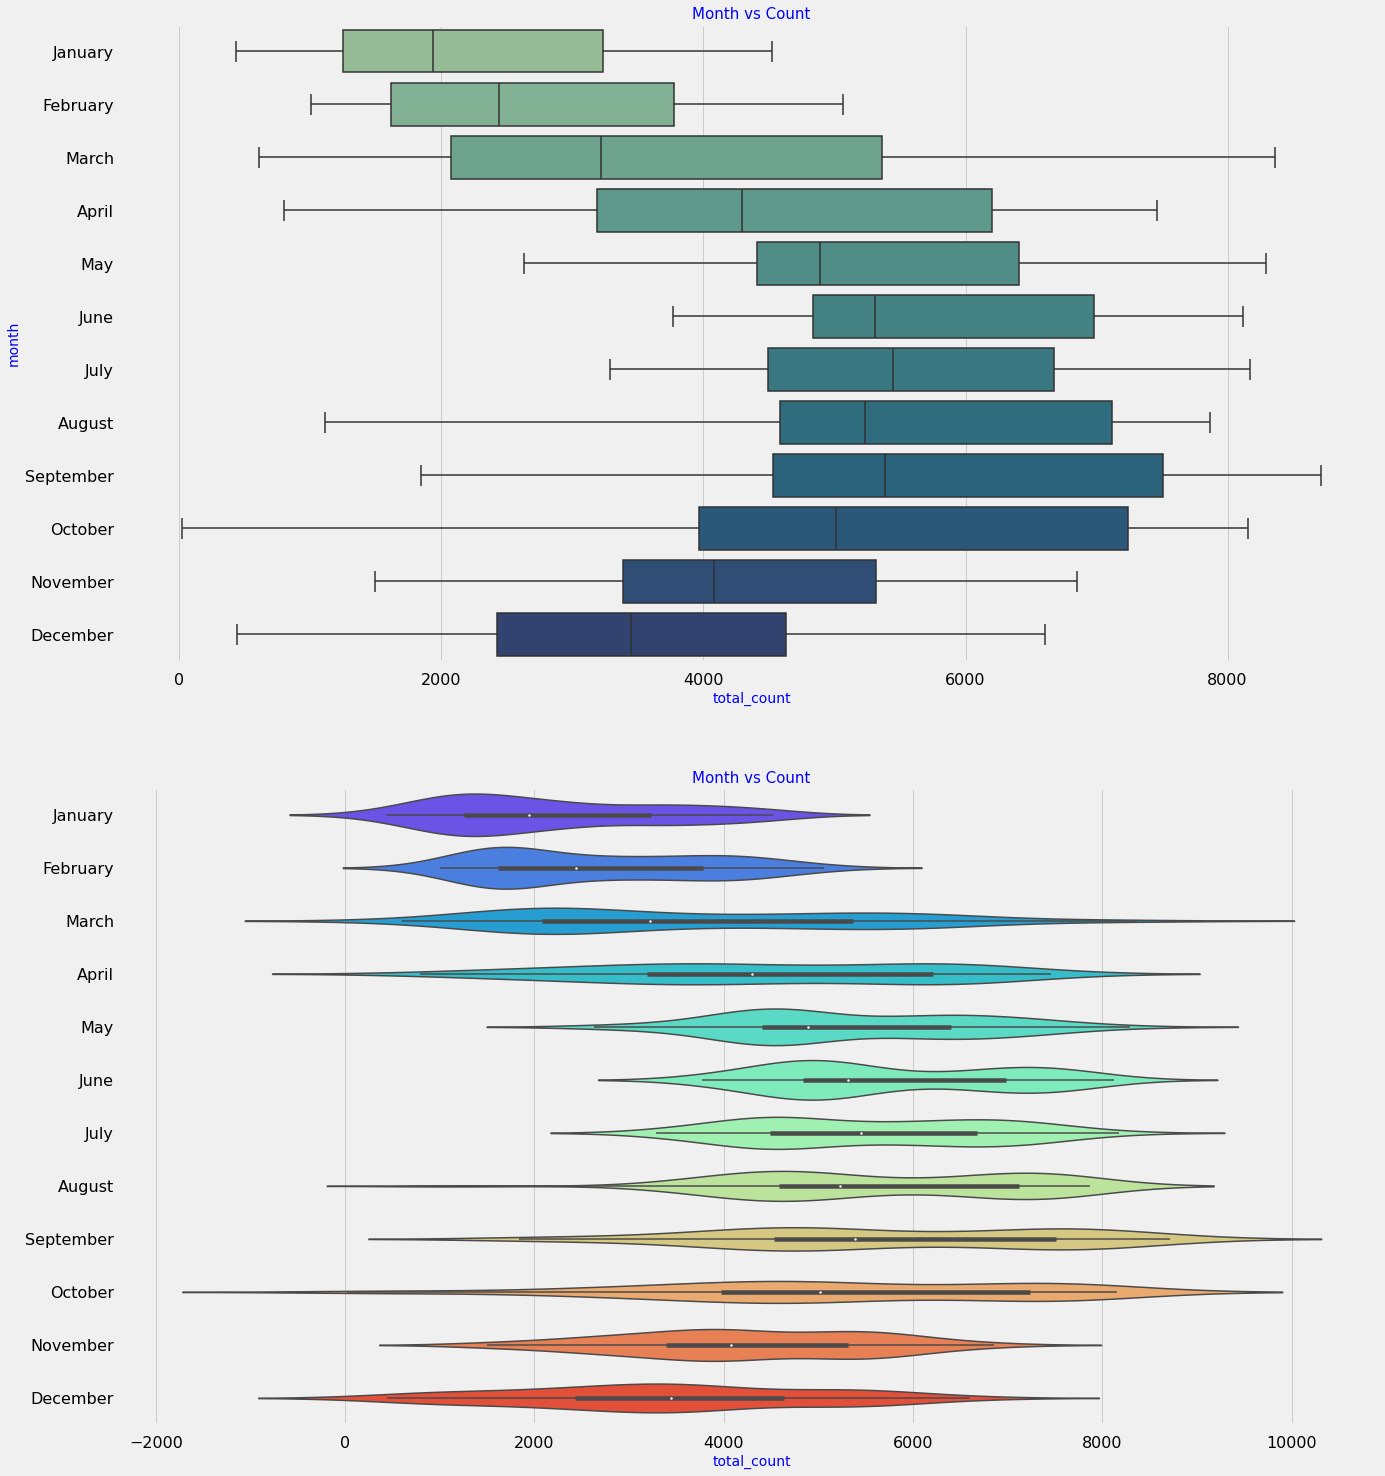

In [313]:
bivariate('total_count','month',day_df, 'Month vs Count', horizontal_layout=False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Demand is continuously growing each month till June.<br>
        2. September month has highest demand.<br>
        3. After September, demand is decreasing.<br>
    </span>    
</div>

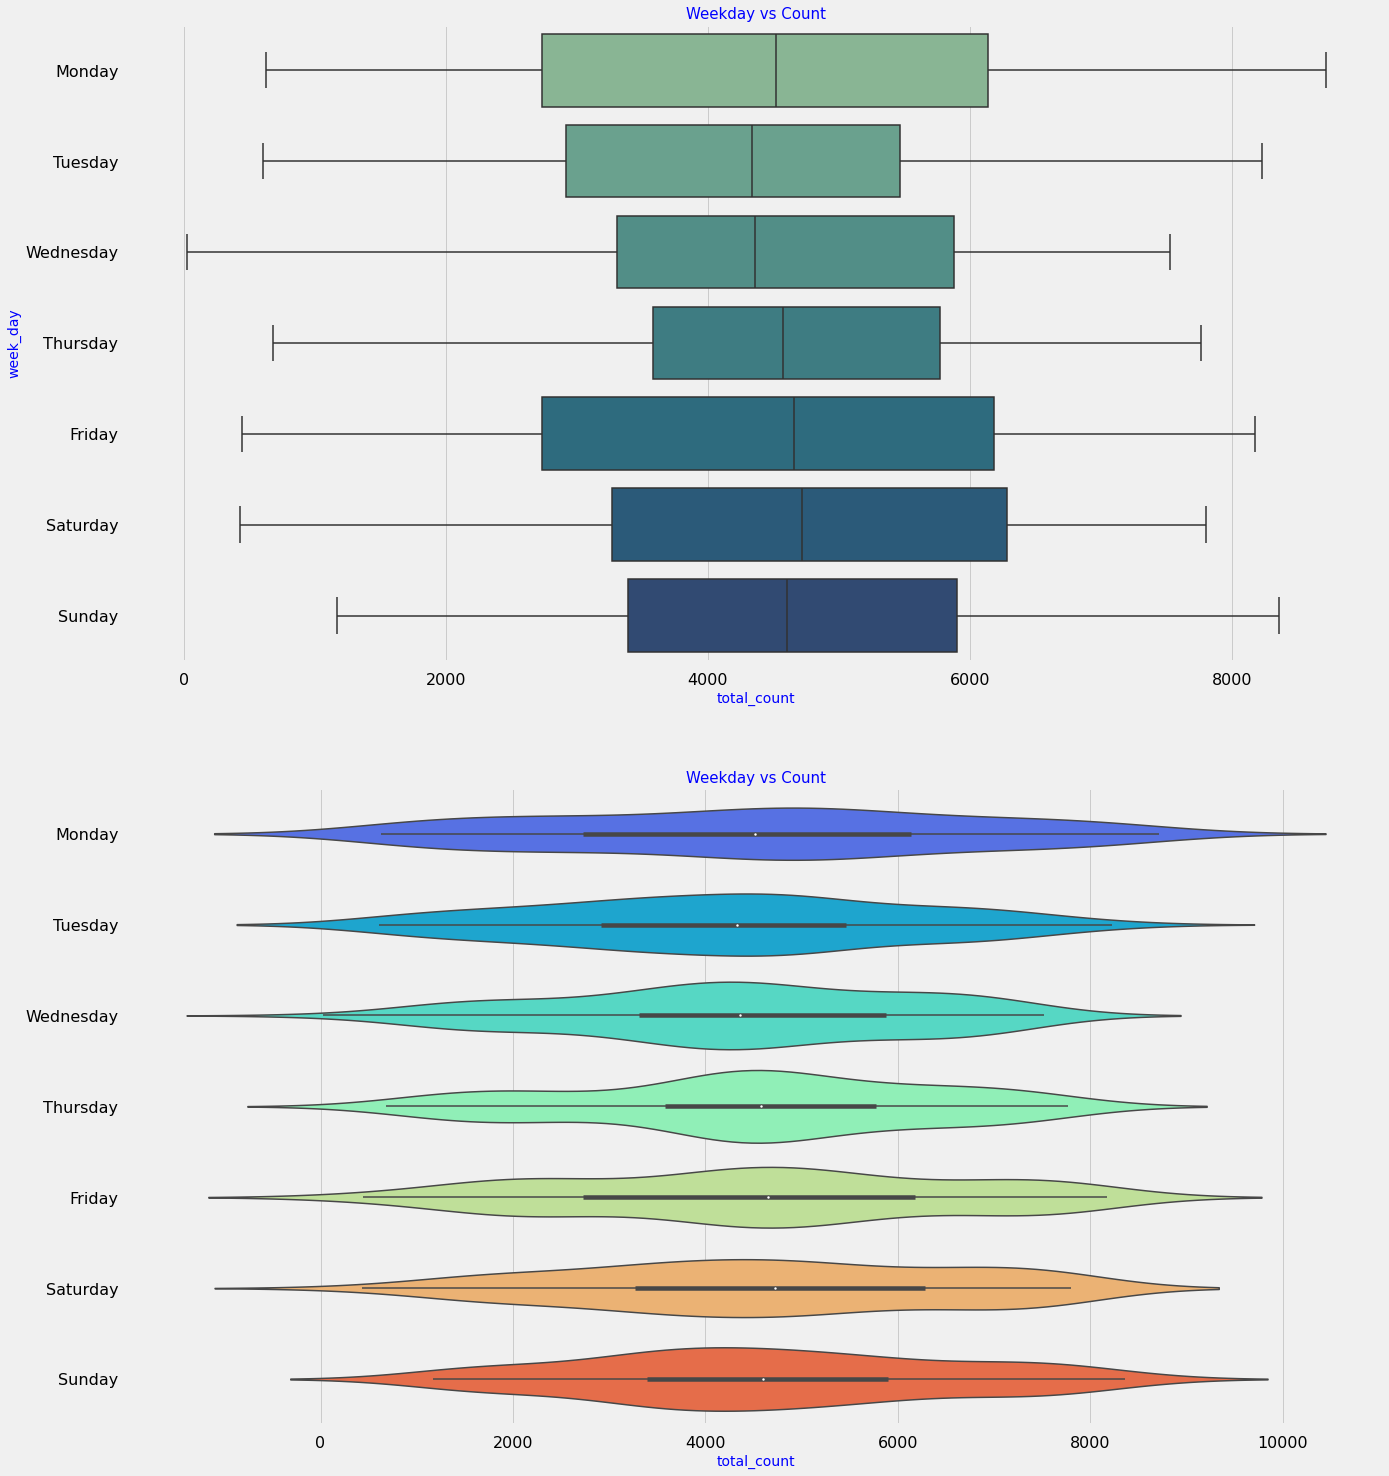

In [314]:
bivariate('total_count','week_day',day_df, 'Weekday vs Count', horizontal_layout=False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Weekday is not giving clear picture abount demand.<br>
    </span>    
</div>

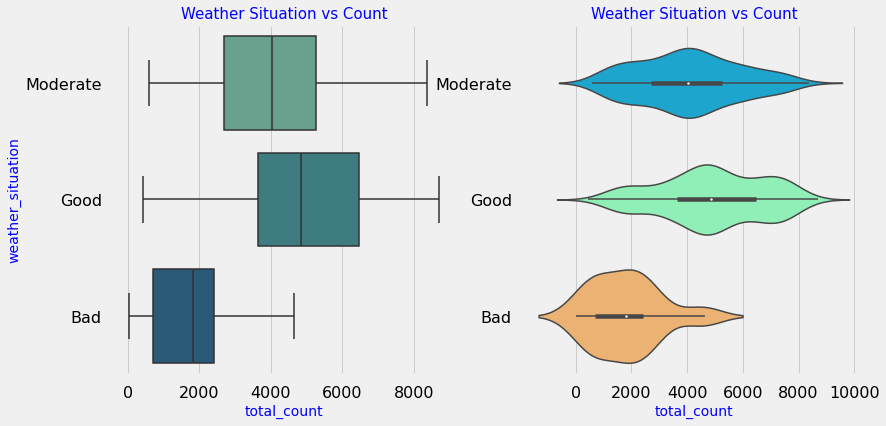

In [315]:
bivariate('total_count','weather_situation',day_df, 'Weather Situation vs Count')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Good weather has the highest demand.
    </span>    
</div>

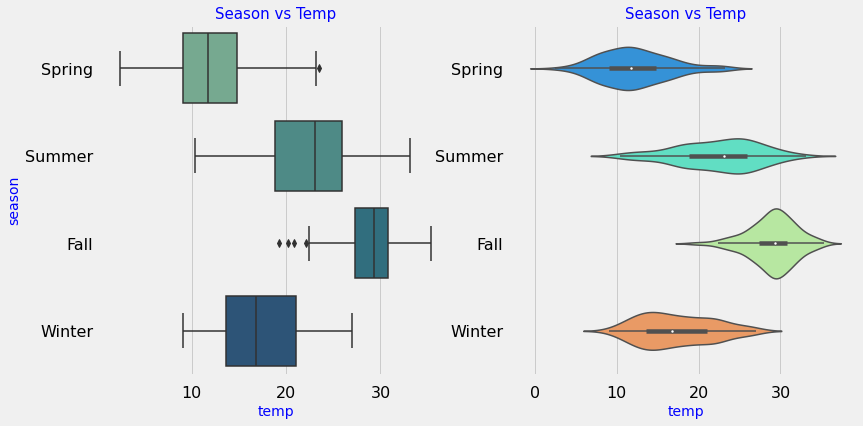

In [316]:
bivariate('temp','season',day_df, 'Season vs Temp')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The temperature demonstrates a progressive increase from spring to fall, with the highest temperatures recorded during the fall season. Conversely, temperatures decline in winter, reflecting a seasonal variation.
    </span>    
</div>

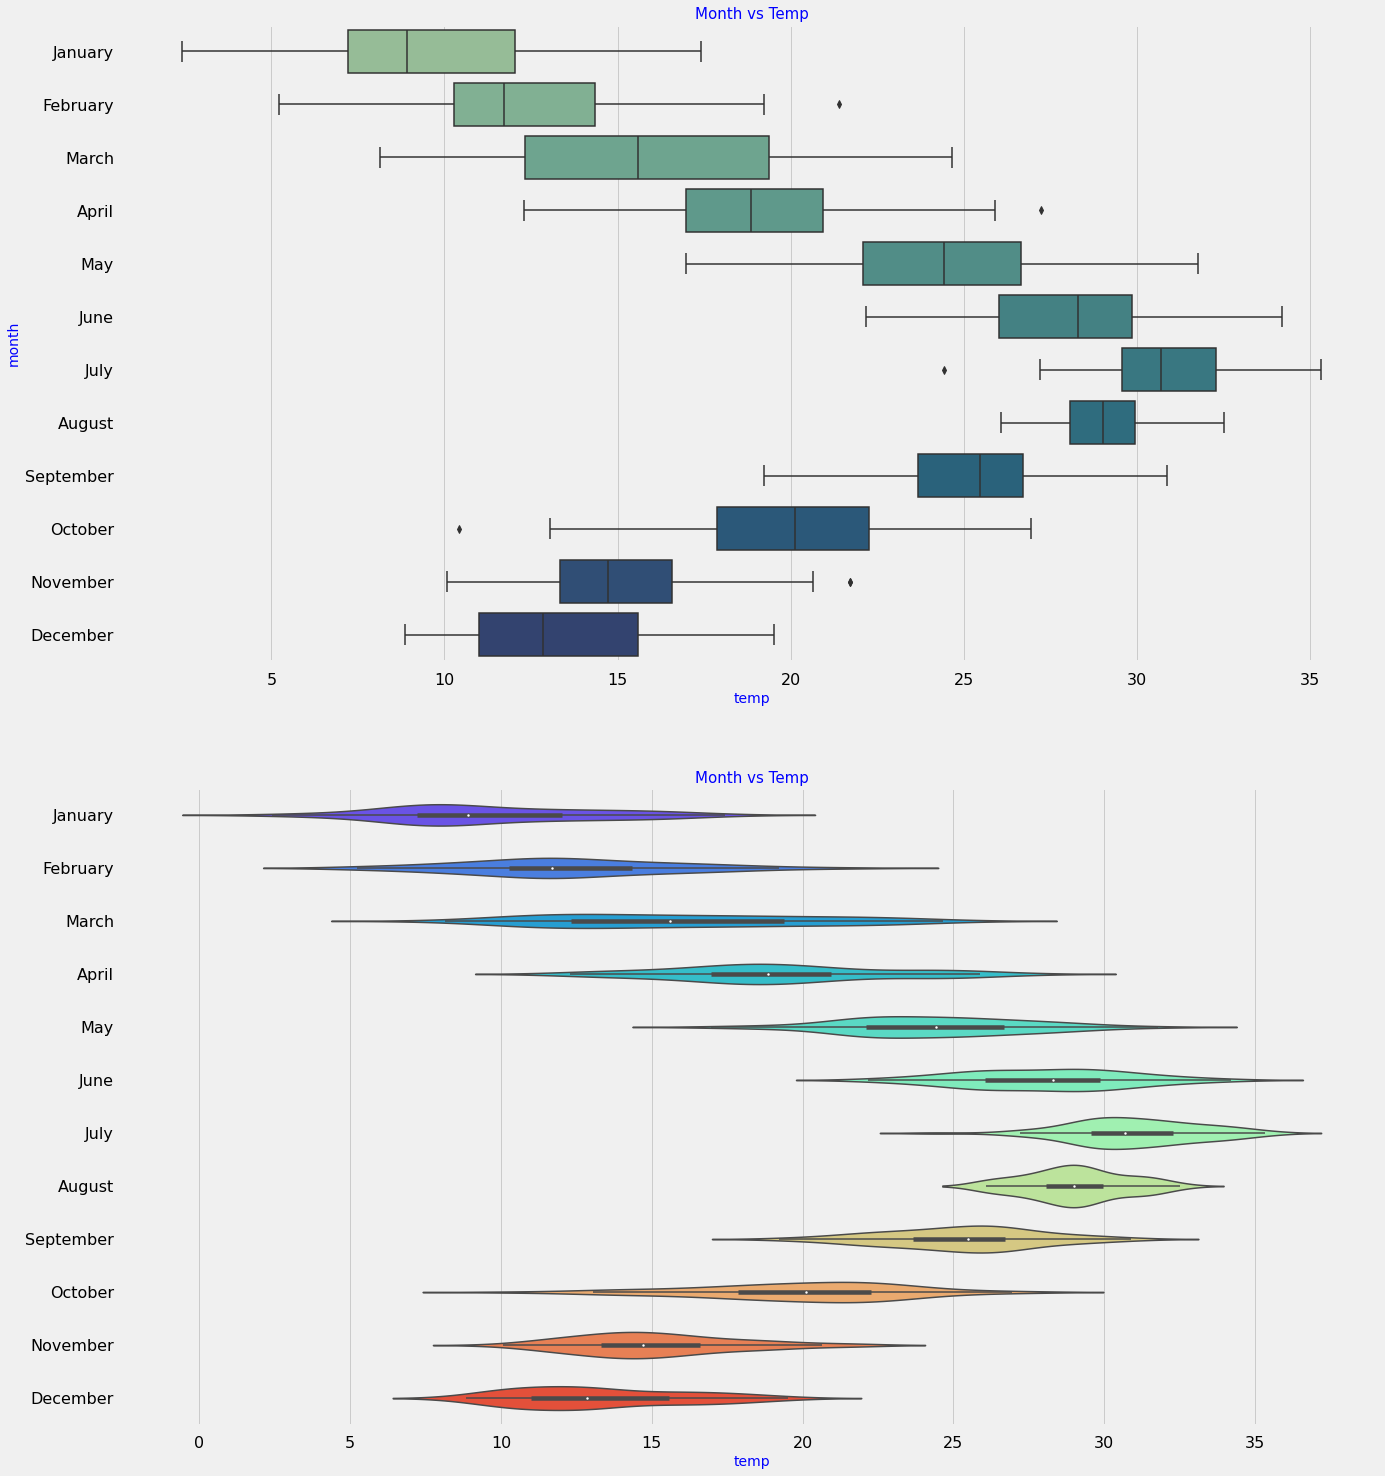

In [317]:
bivariate('temp','month',day_df, 'Month vs Temp', horizontal_layout=False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The temperature demonstrates a progressive increase from january to july, with the highest temperatures recorded during the july month. Conversely, temperatures starts dropping from august to december.
    </span>    
</div>

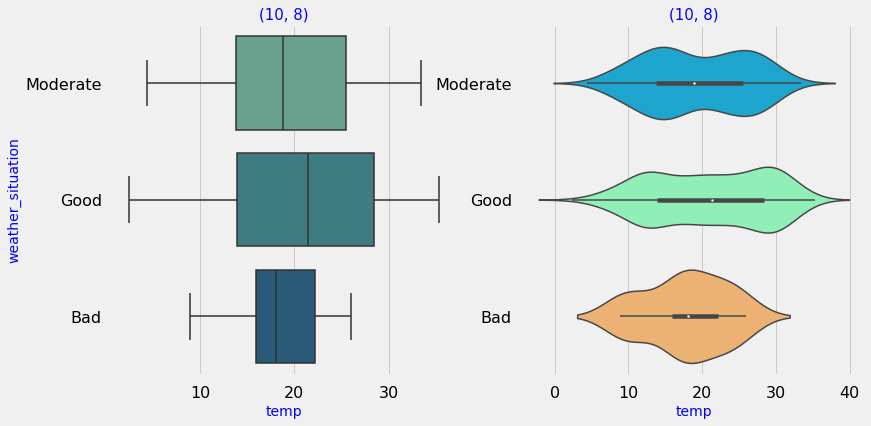

In [318]:
bivariate('temp','weather_situation',day_df,(10,8), 'Weather Condition vs Temp')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The temperature drops when the weather is bad.
    </span>    
</div>

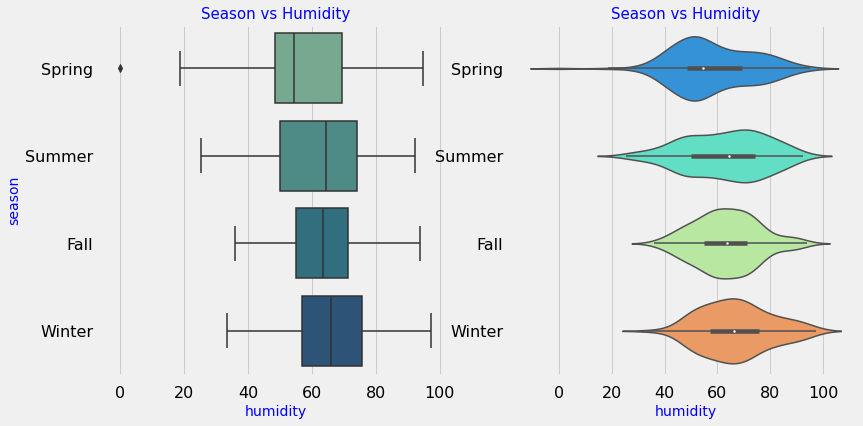

In [319]:
bivariate('humidity','season',day_df, 'Season vs Humidity')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The humidity does not vary significantly based on season
    </span>    
</div>

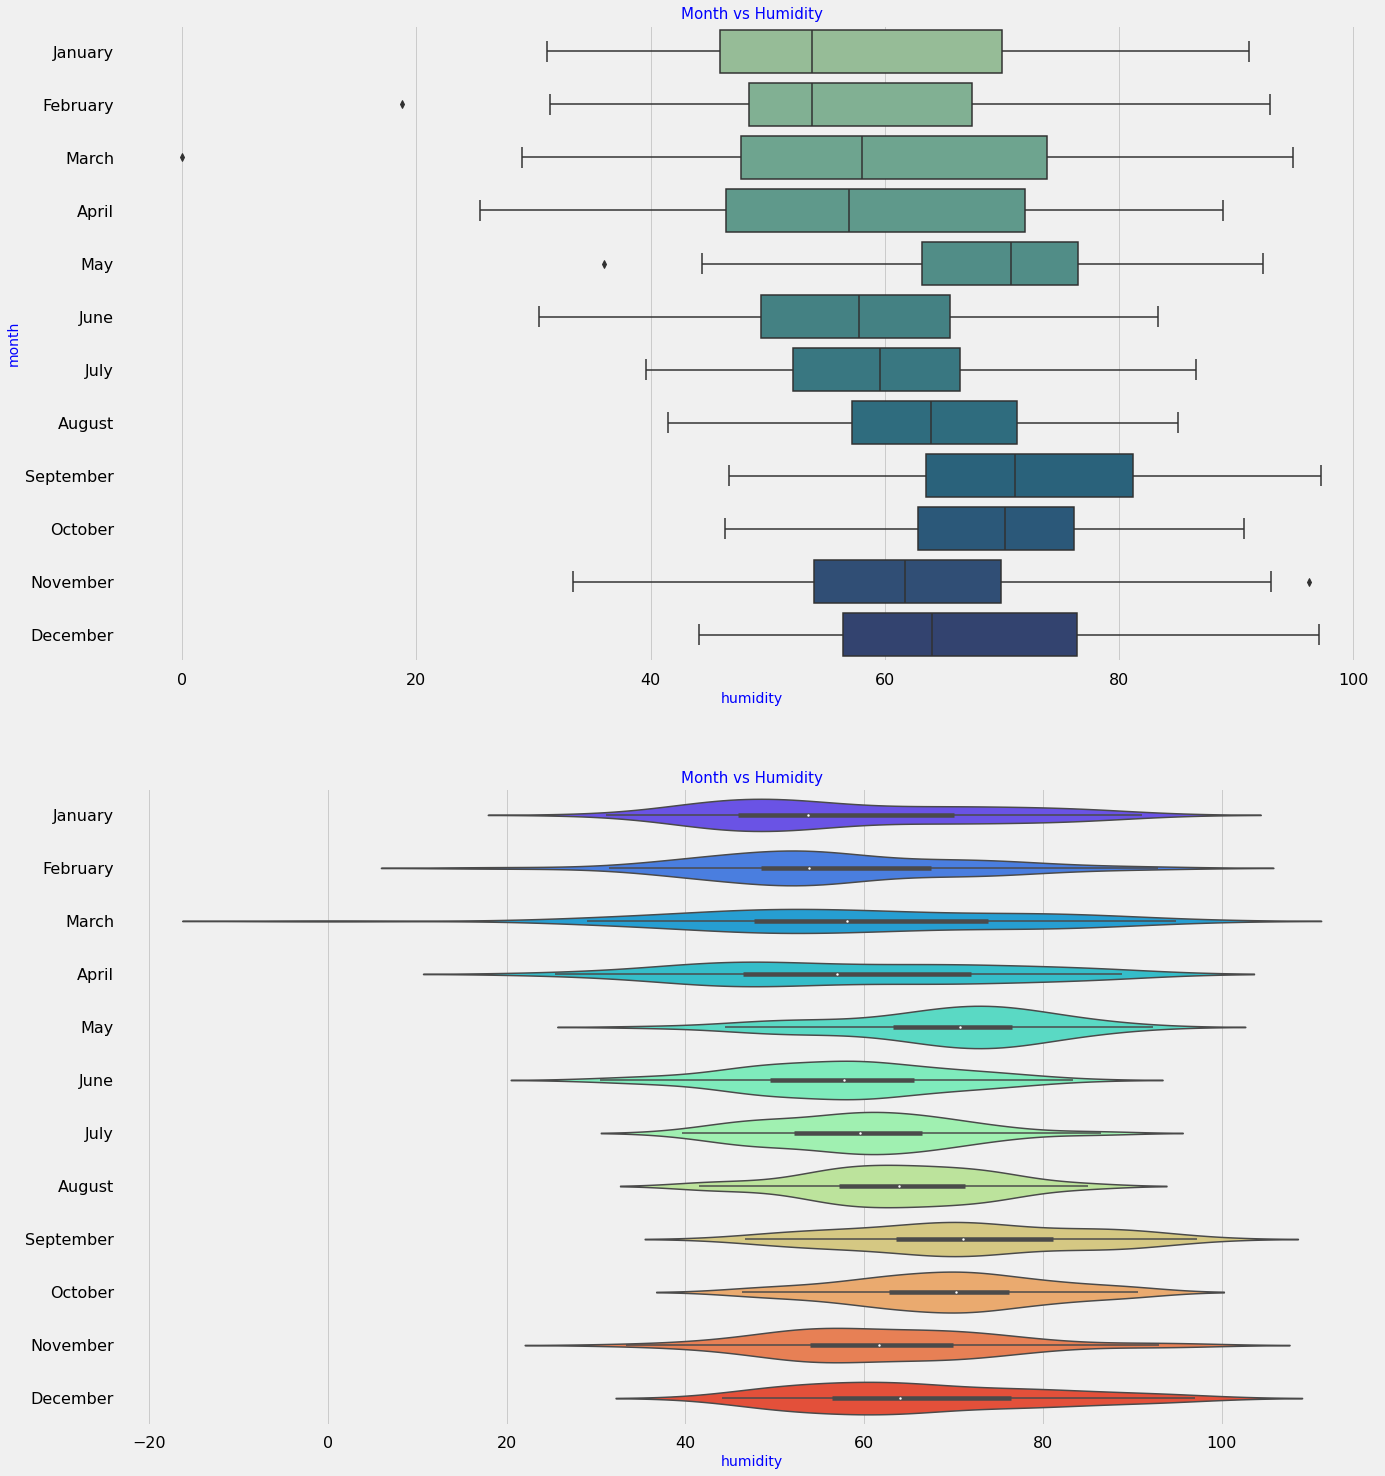

In [320]:
bivariate('humidity','month',day_df, 'Month vs Humidity', horizontal_layout=False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Septermber has the highest humidity
    </span>    
</div>

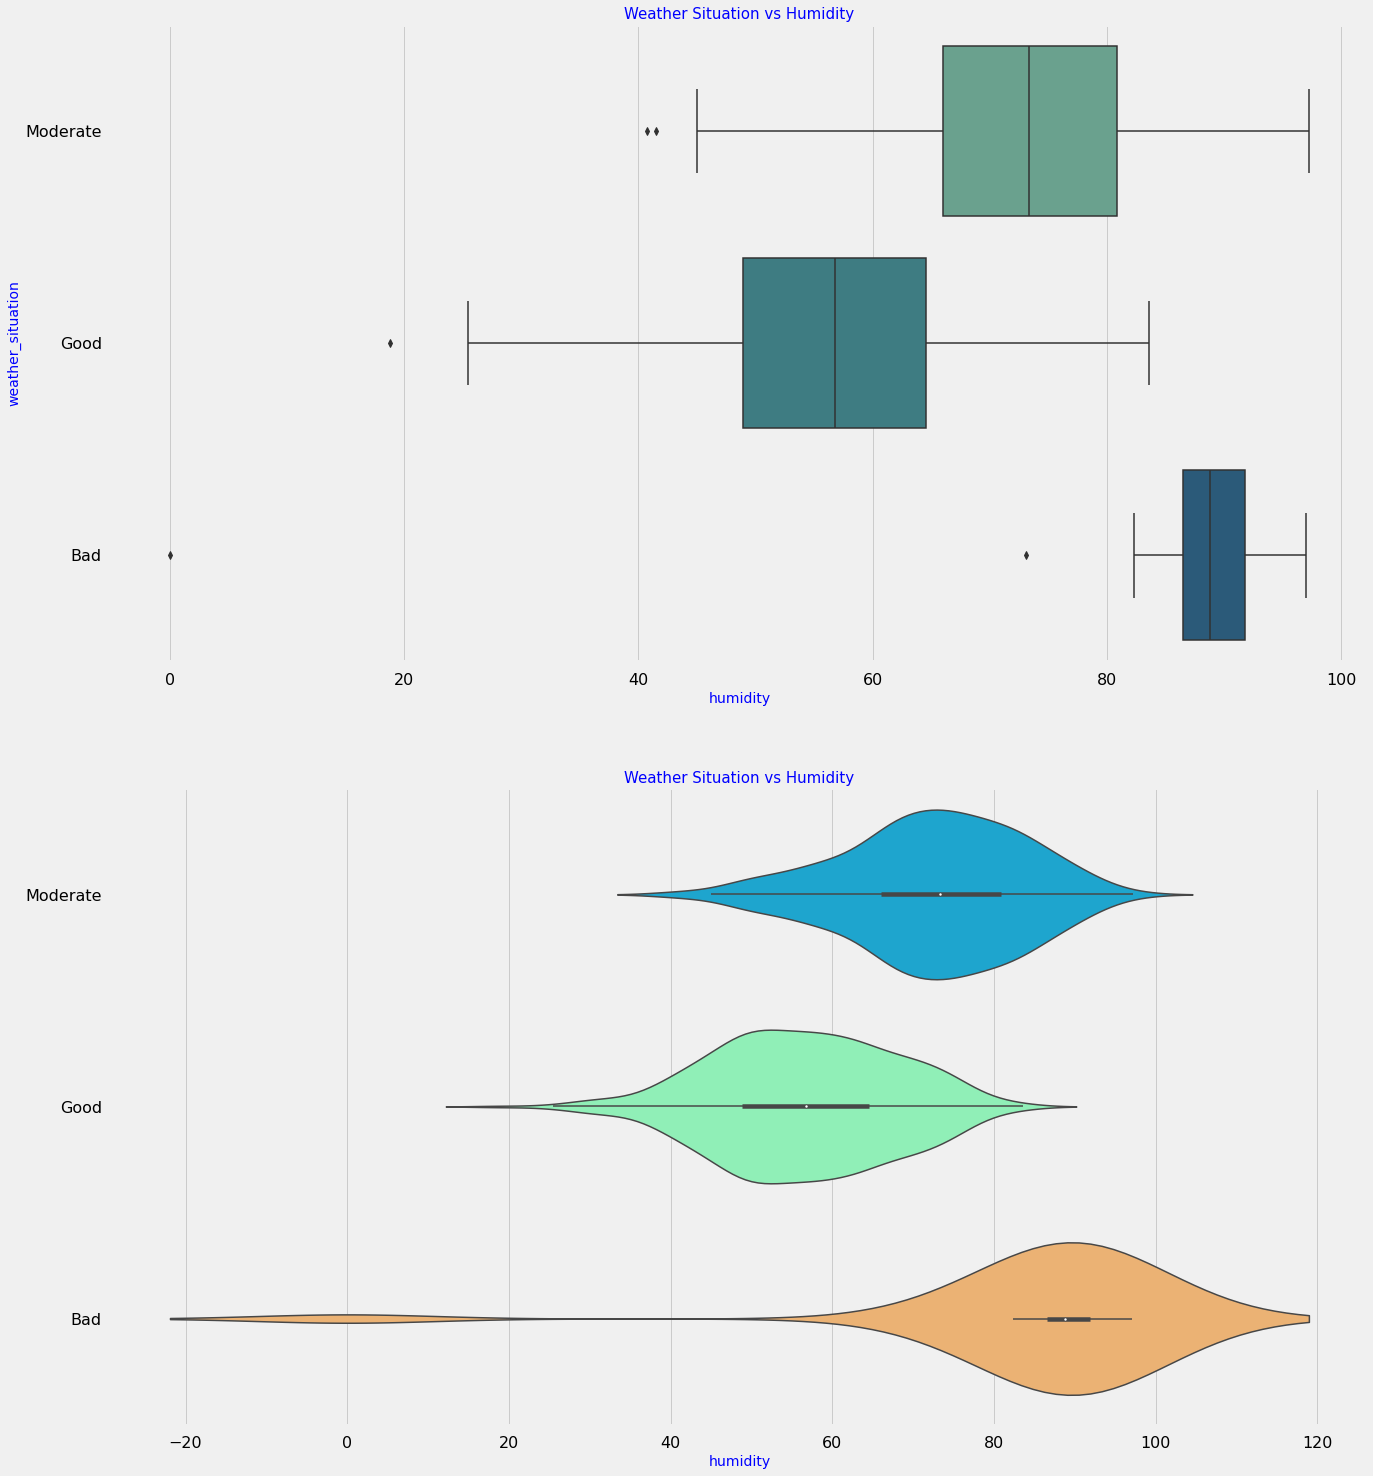

In [321]:
bivariate('humidity','weather_situation',day_df, 'Weather Situation vs Humidity', horizontal_layout=False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Humidity increases as the weather situation drops.
    </span>    
</div>

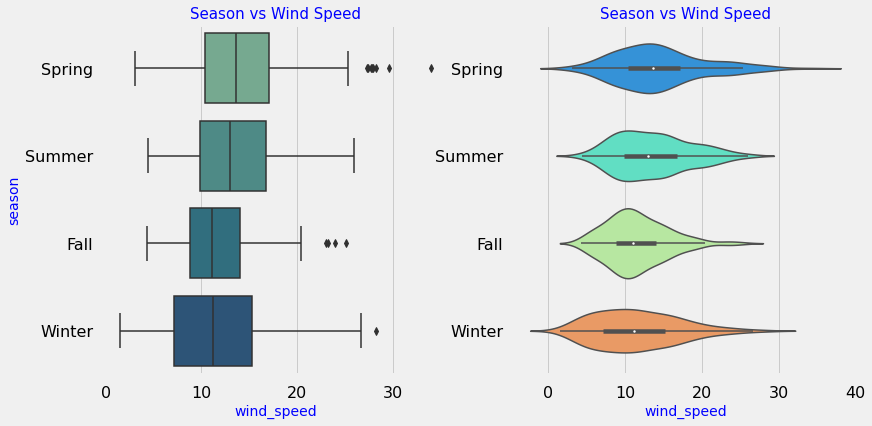

In [322]:
bivariate('wind_speed','season',day_df, 'Season vs Wind Speed')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Wind speed does not vary much significantly based on season.
    </span>    
</div>

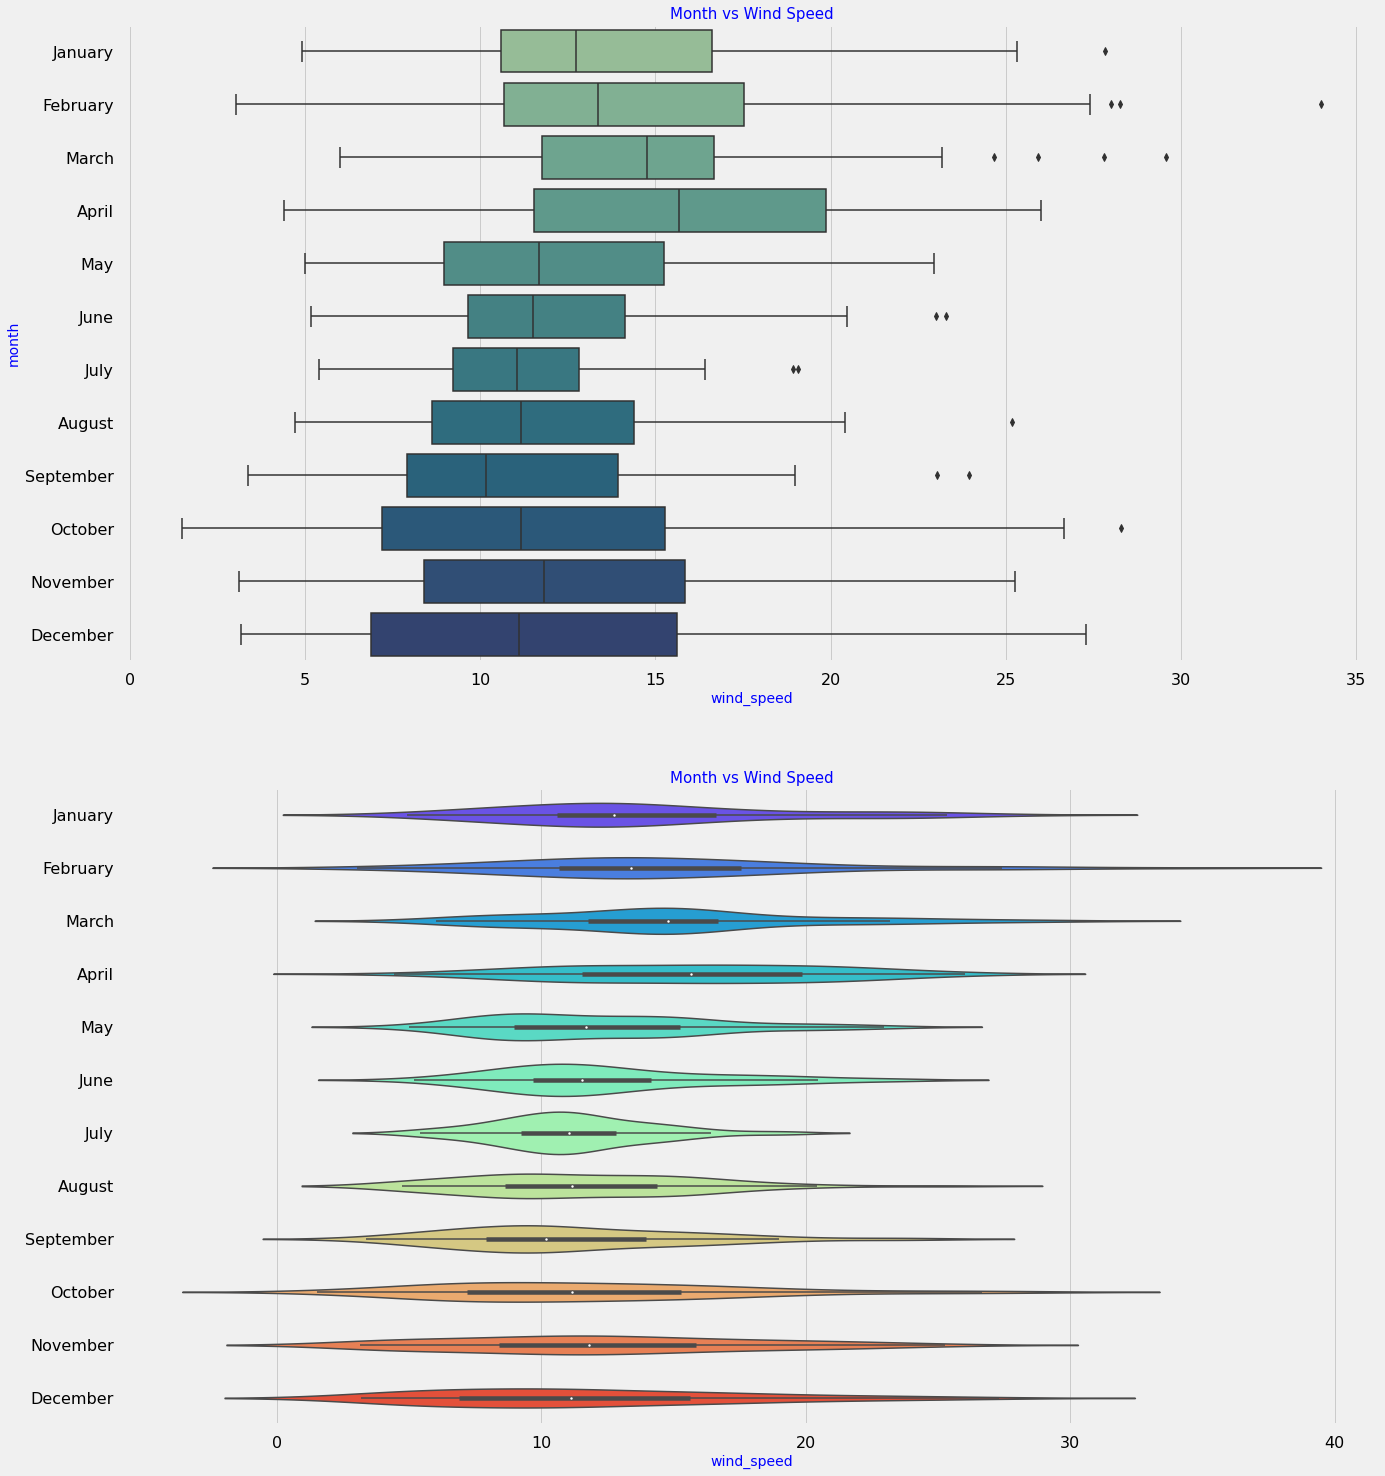

In [323]:
bivariate('wind_speed','month',day_df, 'Month vs Wind Speed', horizontal_layout=False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>April has the highest windspeed. July being the month with very less wind speed.
    </span>    
</div>

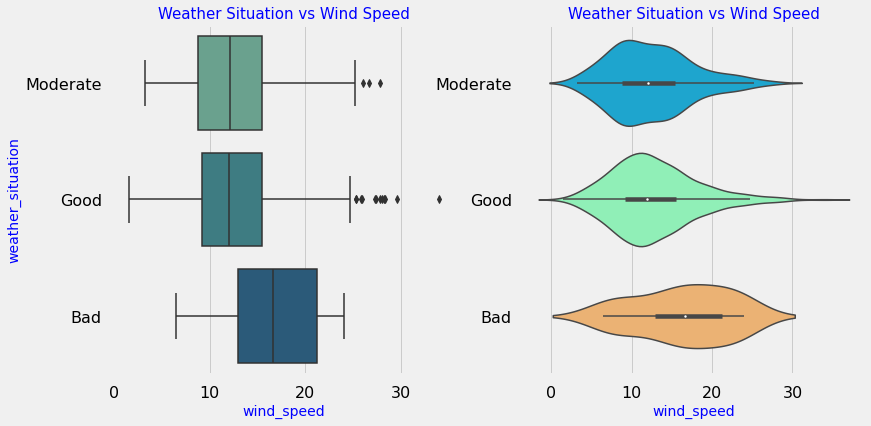

In [324]:
bivariate('wind_speed','weather_situation',day_df, 'Weather Situation vs Wind Speed')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Wind speed is the most when the weather situation is bad.
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        5.5 Scatter Plot and Linear Relationship
    </span>   
</h3>

#### Total Count vs Temp

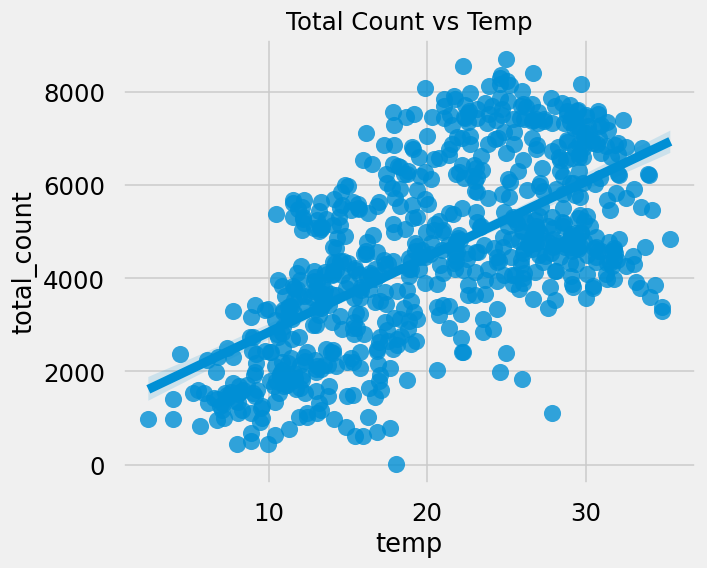

In [325]:
reg_plot(day_df, "total_count", "temp", "Total Count vs Temp")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Demand for bikes is positively correlated to temp.<br>
        2. We can see that total count is linearly increasing with temp indicating linear relation.
    </span>    
</div>

#### Total Count vs Humidity

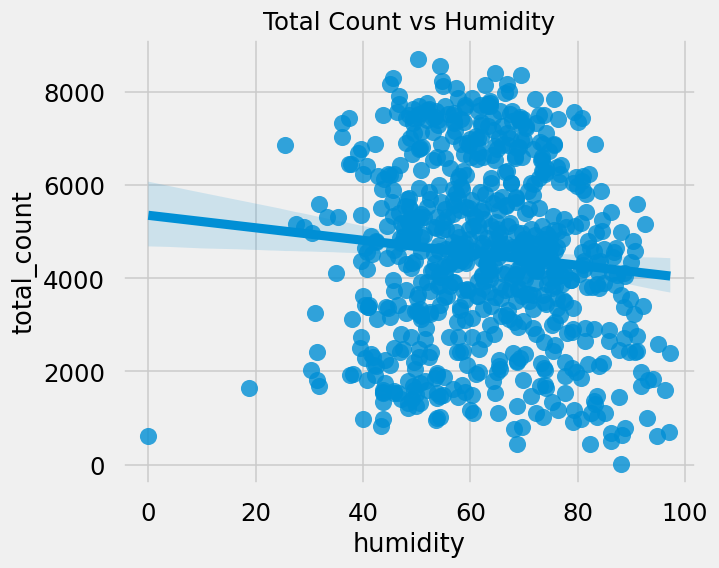

In [326]:
reg_plot(day_df, "total_count", "humidity", "Total Count vs Humidity")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Humidity is values are more scattered around.<br>
        2. Although we can see total count decreasing with increase in humidity.
    </span>    
</div>

#### Total Count vs Wind Speed

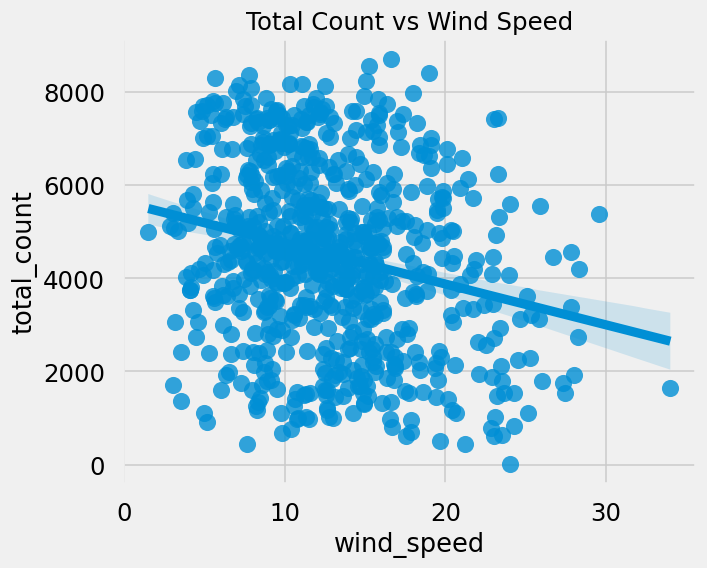

In [327]:
reg_plot(day_df, "total_count", "wind_speed", "Total Count vs Wind Speed")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. Windspeed values are more scattered around.<br>
        2. Although we can see total count decreasing with increase in windspeed.
    </span>    
</div>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        5.6 Correlation of Numeric Features
    </span>   
</h3>

Heatmaps are powerful visual tools for exploring and understanding patterns in data. It is particularly useful for visualizing the correlation between two variables or the intensity of a phenomenon across multiple variables.

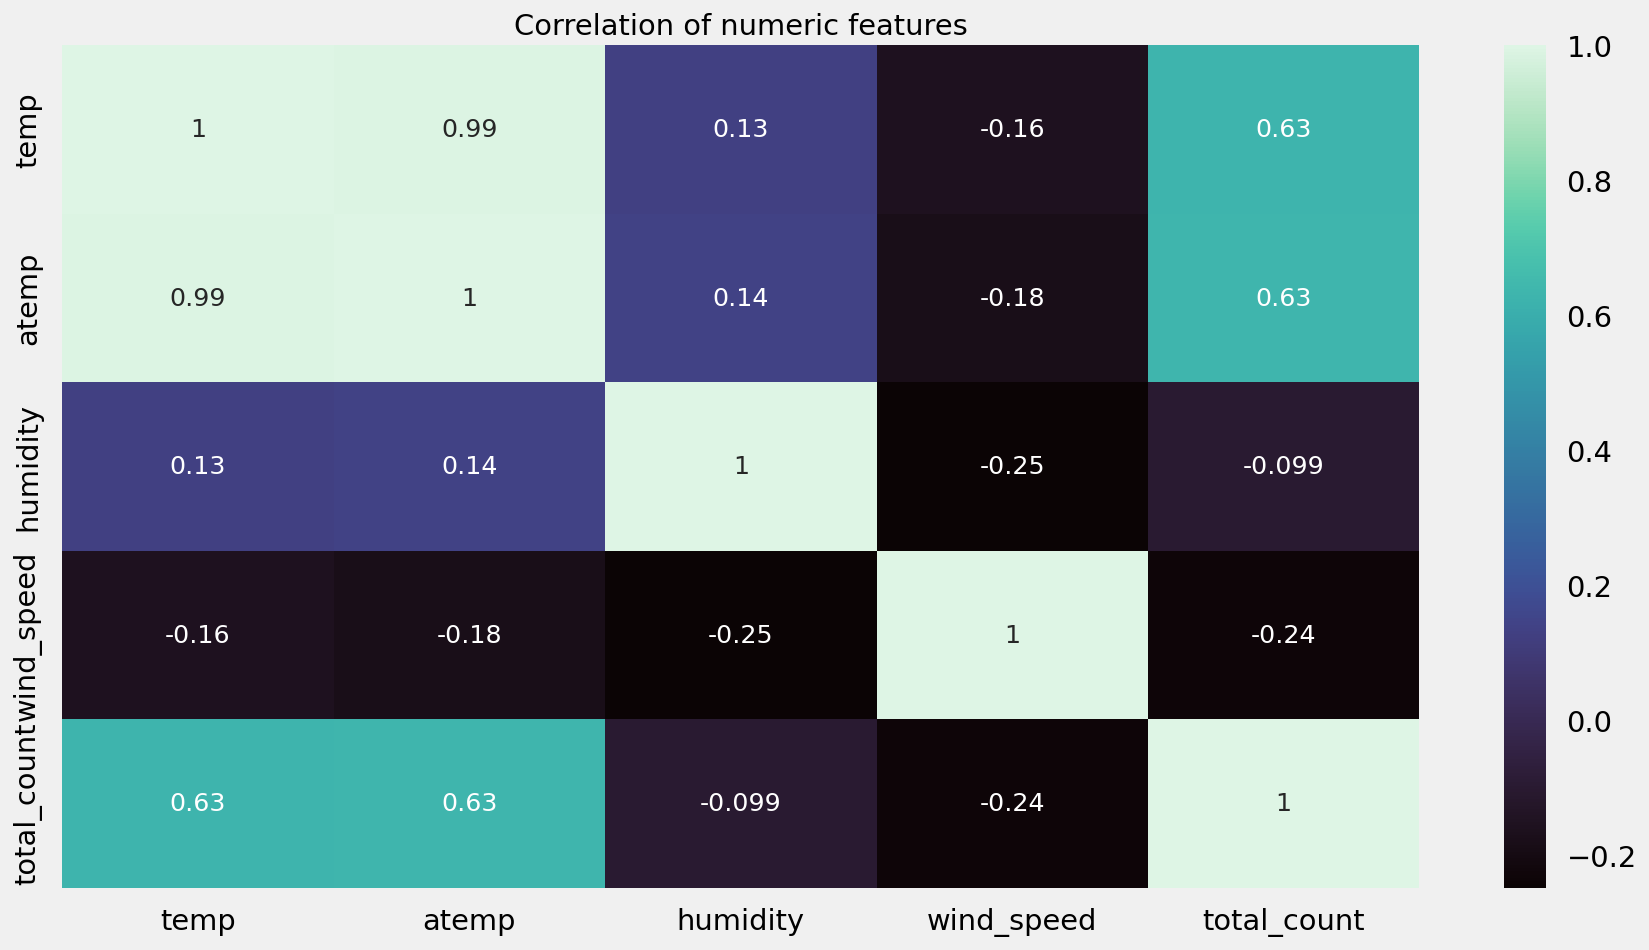

In [328]:
features = ["temp","atemp","humidity","wind_speed","total_count"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(day_df[features].corr(),annot= True,cmap="mako")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        1. The variables "Temp" and "Atemp" exhibit a high correlation, suggesting a strong linear relationship between them. While it's advisable to consider removing one to mitigate multicollinearity in certain analyses, for the purposes of your analysis, both variables will be retained for further examination.<br>
        2. The variables "Temp" and "Atemp" demonstrate a substantial correlation with the "total_count" variable. This indicates a noteworthy relationship between temperature-related features and the overall bike usage count. This correlation could be valuable for further analysis and modeling, considering the potential impact of temperature on the total bike count.
    </span>    
</div>

<a id="import"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
        6. Data Preparation for Linear Regression
    </span>   
</h2>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        6.1 Create Dummy Variables
    </span>   
</h3>

In the context of creating dummy variables for categorical features like season, month, and week_day, it is a common practice to employ (p-1) dummies to represent p categories, thereby avoiding multicollinearity. However, for the "weather_situation" feature, retaining the first column is sensible, as it preserves the information related to severe weather conditions. This decision ensures that the model considers the distinct context associated with adverse weather situations without causing data loss.

In [329]:
day_df = pd.get_dummies(data=day_df,columns=["season","month","week_day"],drop_first=True)
day_df = pd.get_dummies(data=day_df,columns=["weather_situation"])
day_df['year'] = day_df['year'].map({ 2018: 0, 2019: 1 })

In [330]:
#printing columns after creating dummies
day_df.columns

Index(['year', 'holiday', 'working_day', 'temp', 'atemp', 'humidity', 'wind_speed', 'total_count', 'season_Spring', 'season_Summer', 'season_Winter', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'week_day_Monday', 'week_day_Saturday', 'week_day_Sunday', 'week_day_Thursday', 'week_day_Tuesday', 'week_day_Wednesday', 'weather_situation_Bad', 'weather_situation_Good', 'weather_situation_Moderate'], dtype='object')

In [331]:
# Print first few rows for inspection
day_df.head()

,year,holiday,working_day,temp,atemp,humidity,wind_speed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_situation_Bad,weather_situation_Good,weather_situation_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [332]:
day_df.shape

(730, 31)

In [333]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   working_day                 730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   humidity                    730 non-null    float64
 6   wind_speed                  730 non-null    float64
 7   total_count                 730 non-null    int64  
 8   season_Spring               730 non-null    uint8  
 9   season_Summer               730 non-null    uint8  
 10  season_Winter               730 non-null    uint8  
 11  month_August                730 non-null    uint8  
 12  month_December              730 non-null    uint8  
 13  month_February              730 non

<a id="import"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
        7. Pre-Process Model Building
    </span>   
</h2>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        7.1 Train-Test Split
    </span>   
</h3>

In [334]:
train, test = train_test_split(day_df, train_size=0.7, test_size=0.3, random_state=100)

In [335]:
# Check the test shape
test.shape

(219, 31)

In [336]:
# Check the train shape
train.shape

(510, 31)

In [337]:
day_df.head()

,year,holiday,working_day,temp,atemp,humidity,wind_speed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_situation_Bad,weather_situation_Good,weather_situation_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        7.2 Rescaling the Features
    </span>   
</h3>

While the scaling of variables may not significantly impact a simple linear regression model, it becomes crucial in the case of multiple linear regression. In your dataset, the "total_count" feature has considerably higher values compared to other features like "temp" and "atemp." To address this discrepancy and ensure a comparable scale among variables, it is advisable to perform rescaling.

Min-Max scaling is a method chosen in this context. It transforms the variables in such a way that they fall within a common range, typically between 0 and 1. This practice is essential for preventing coefficients in the regression model from being disproportionately large or small compared to each other. Standardization, another common method involving mean and standard deviation, is an alternative choice for achieving similar results. Rescaling ensures that the coefficients obtained from the regression model are on a consistent scale, facilitating model evaluation.

In [338]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [339]:
# Apply scaler() to all the columns except the 'dummy' variables.
vars_to_scale= ['humidity','wind_speed','temp','atemp']

train[vars_to_scale] = scaler.fit_transform(train[vars_to_scale])

In [340]:
# Lets check the data after scaling
train.head()

,year,holiday,working_day,temp,atemp,humidity,wind_speed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_situation_Bad,weather_situation_Good,weather_situation_Moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [341]:
train.describe()

,year,holiday,working_day,temp,atemp,humidity,wind_speed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_situation_Bad,weather_situation_Good,weather_situation_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


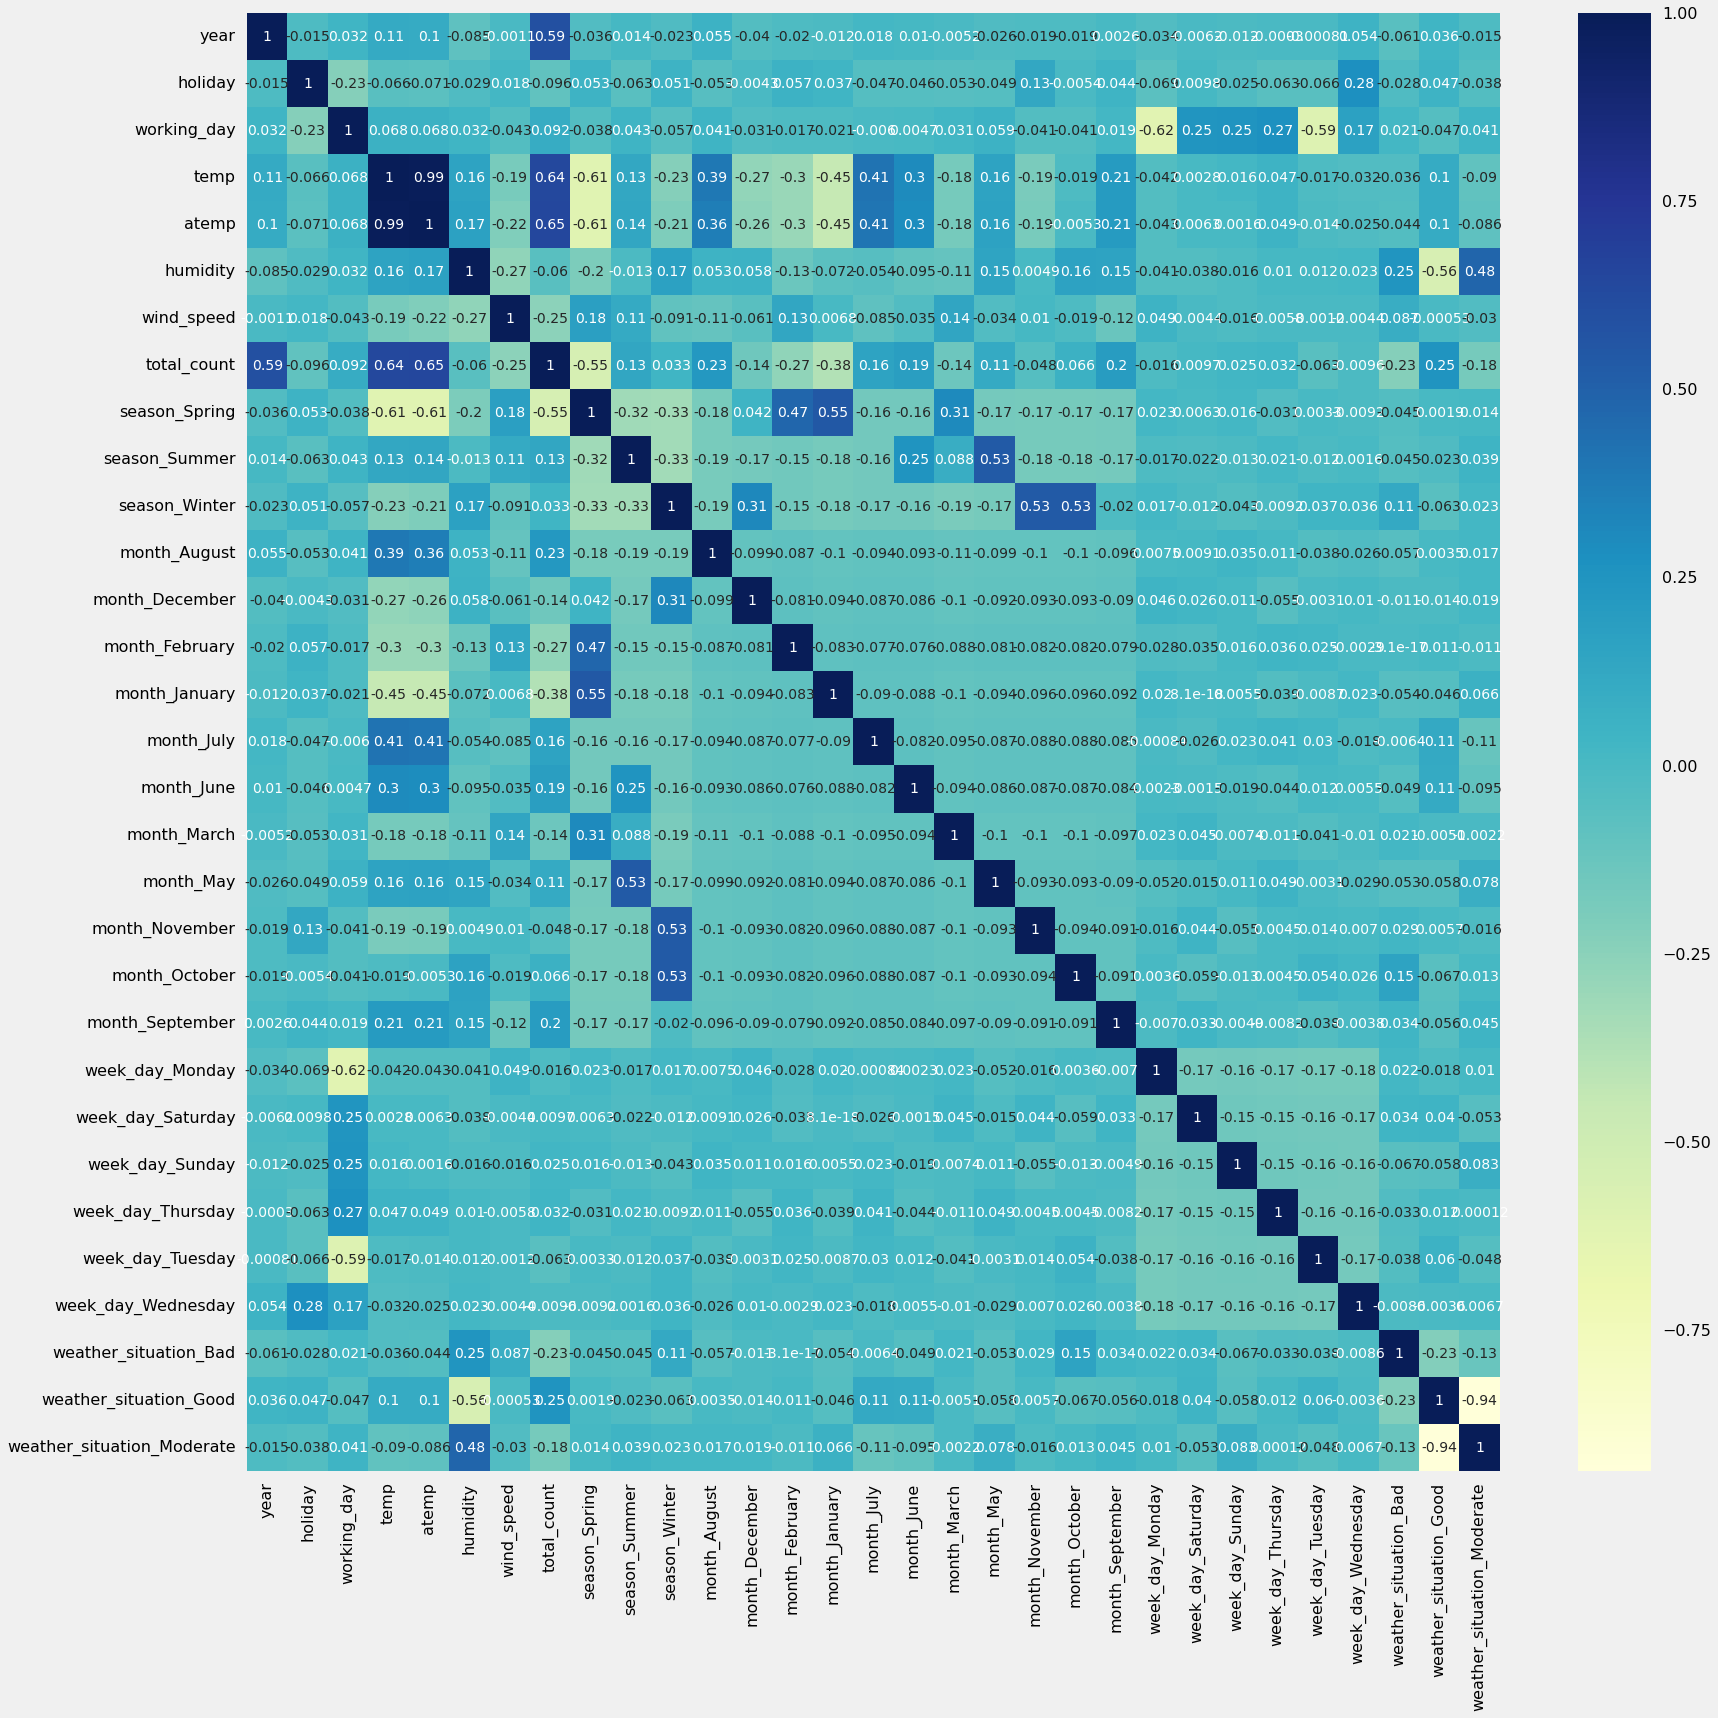

In [342]:
# Let's check the coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Certainly, leveraging the visual information from the map, it is apparent that both "atemp" and "temp" exhibit correlation with the target variable "total_count." Given the limited insights into the other independent variables, the decision to construct a model utilizing all available columns is reasonable. This approach allows for a comprehensive examination of the potential impact of each variable on the target variable "total_count" and provides a more holistic understanding of the underlying relationships in the dataset.
    </span>    
</div>

Let's divide into X and y sets for model building

In [343]:
y_train = train.pop('total_count')
X_train = train

In [344]:
y_train.shape

(510,)

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        7.3 Building a Linear Model using RFE
    </span>   
</h3>

The approach to combine Recursive Feature Elimination (RFE) for feature selection and subsequently using the statsmodel approach for model building is a sound strategy. RFE helps identify the most relevant features, eliminating less impactful ones, which contributes to model simplification and potentially enhances performance. Following feature selection, employing the statsmodel approach allows for a detailed statistical analysis of the relationships between the selected features and the target variable, aiding in model interpretation and understanding. This mixed approach is a thoughtful way to address both feature selection and model building aspects in a systematic manner.

Leveraging the LinearRegression function from SciKit Learn for its compatibility with Recursive Feature Elimination (RFE) is a practical choice. Given that RFE is a utility from sklearn, using the LinearRegression function from the same library ensures seamless integration and facilitates an efficient feature selection process. This approach allows us to streamline the implementation of RFE and subsequently proceed with the model-building process using the selected features.

In [345]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [346]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [347]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('working_day', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', False, 16),
 ('wind_speed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 4),
 ('season_Winter', True, 1),
 ('month_August', False, 9),
 ('month_December', False, 2),
 ('month_February', False, 14),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 11),
 ('month_March', False, 10),
 ('month_May', False, 7),
 ('month_November', False, 3),
 ('month_October', False, 12),
 ('month_September', True, 1),
 ('week_day_Monday', True, 1),
 ('week_day_Saturday', False, 15),
 ('week_day_Sunday', False, 13),
 ('week_day_Thursday', False, 6),
 ('week_day_Tuesday', True, 1),
 ('week_day_Wednesday', False, 5),
 ('weather_situation_Bad', True, 1),
 ('weather_situation_Good', True, 1),
 ('weather_situation_Moderate', True, 1)]

List of features selected by RFE

In [348]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'working_day', 'temp', 'wind_speed', 'season_Spring', 'season_Winter', 'month_January', 'month_July', 'month_September', 'week_day_Monday', 'week_day_Tuesday', 'weather_situation_Bad', 'weather_situation_Good', 'weather_situation_Moderate'], dtype='object')

List of features removed by RFE

In [349]:
X_train.columns[~rfe.support_]

Index(['atemp', 'humidity', 'season_Summer', 'month_August', 'month_December', 'month_February', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'week_day_Saturday', 'week_day_Sunday', 'week_day_Thursday', 'week_day_Wednesday'], dtype='object')

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        7.4 Manual Elimination
    </span>   
</h3>

#### Helper Function to Build Model using Statsmodel API

In [350]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs and print them

In [351]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

<a id="import"></a>
<h2>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #0284c7'>
        8. Model Building
    </span>   
</h2>

<a id="null"></a>
<h3>   
    <span style='font-family:Arial, Helvetica, sans-serif; color: #ca8a04'>
        8.1 Model 1 - Start with all variables selected by RFE
    </span>   
</h3>